In [ ]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
print(os.getcwd())


/global/u1/e/edown/code/project/clustering_sv3


! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS*

Calculating fsky with randoms

with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_N_nz.txt') as file:
    print('N')
    print(file.read())
    
with open('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/BGS_ANY_S_nz.txt') as file:
    print('S')
    print(file.read())

In [ ]:
A = 86.4016 + 87.3556
print(A)

173.7572


In [ ]:
N0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_0_clustering.ran.fits')
S0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_0_clustering.ran.fits')

filelist_N = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_*_clustering.ran.fits')
filelist_S = glob.glob('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_*_clustering.ran.fits')

filelist = filelist_N + filelist_S
print(np.shape(filelist))
randoms = Table(names=(np.array(N0.dtype.names)), dtype=N0.dtype)

for f in filelist:
    print(f)
    randoms = np.hstack((randoms,Table.read(f)))
    
randoms = Table(randoms)

In [5]:
#print(np.shape(randoms)[0])
print(np.shape(N0)[0] + np.shape(S0)[0])
sky_area = 4*np.pi*np.rad2deg(1)**2
print(sky_area)
survey_area = 434393 / 2500 #randoms / deg^2
print(survey_area) # in deg^2
fsky = survey_area/sky_area
print(fsky)

A = 86.4016 + 87.3556
print(A)

fsky_hdr = A/sky_area
print(fsky_hdr)



434393
41252.96124941928
173.7572
0.004211993387564293
173.7572
0.004211993387564293


Reading data

In [53]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_ANY_S_clustering.dat.fits')
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5

N_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S_bright = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N_bright['APPLIM'] = 19.539993
S_bright['APPLIM'] = 19.5
N_bright['ZLIM_UPPER'] = 0.6
S_bright['ZLIM_UPPER'] = 0.6

In [ ]:
N

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP,APPLIM
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3.0,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.0076878089647186044,0.0189012692383565,19.539993
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.0076878089647186044,0.0189012692383565,19.539993
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3.0,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.017861571797760857,0.008223843310435642,19.539993
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3.0,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.276855613881954,-20.65269989753773,0.0076878089647186044,0.0189012692383565,19.539993
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0025093016341671114,0.055734255355941044,19.539993
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.014175378619991408,0.010340274472459292,19.539993
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3.0,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.22584033193759404,-21.029216752429768,0.013312673657954965,0.011002985286624948,19.539993
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3.0,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.0307418

In [57]:
S.dtype.names

('RA',
 'DEC',
 'TARGETID',
 'NTILE',
 'TILES',
 'Z',
 'COMP_TILE',
 'rosette_number',
 'rosette_r',
 'FRACZ_TILELOCID',
 'BITWEIGHTS',
 'PROB_OBS',
 'WEIGHT_ZFAIL',
 'WEIGHT',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_R',
 'NZ',
 'WEIGHT_FKP',
 'APPLIM')

In [47]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined
data['ZLIM_UPPER'] = 0.6
data_bright = Table(np.hstack((N_bright,S_bright))) #BGS BRIGHT in N, S combined


Plot - absmag histogram

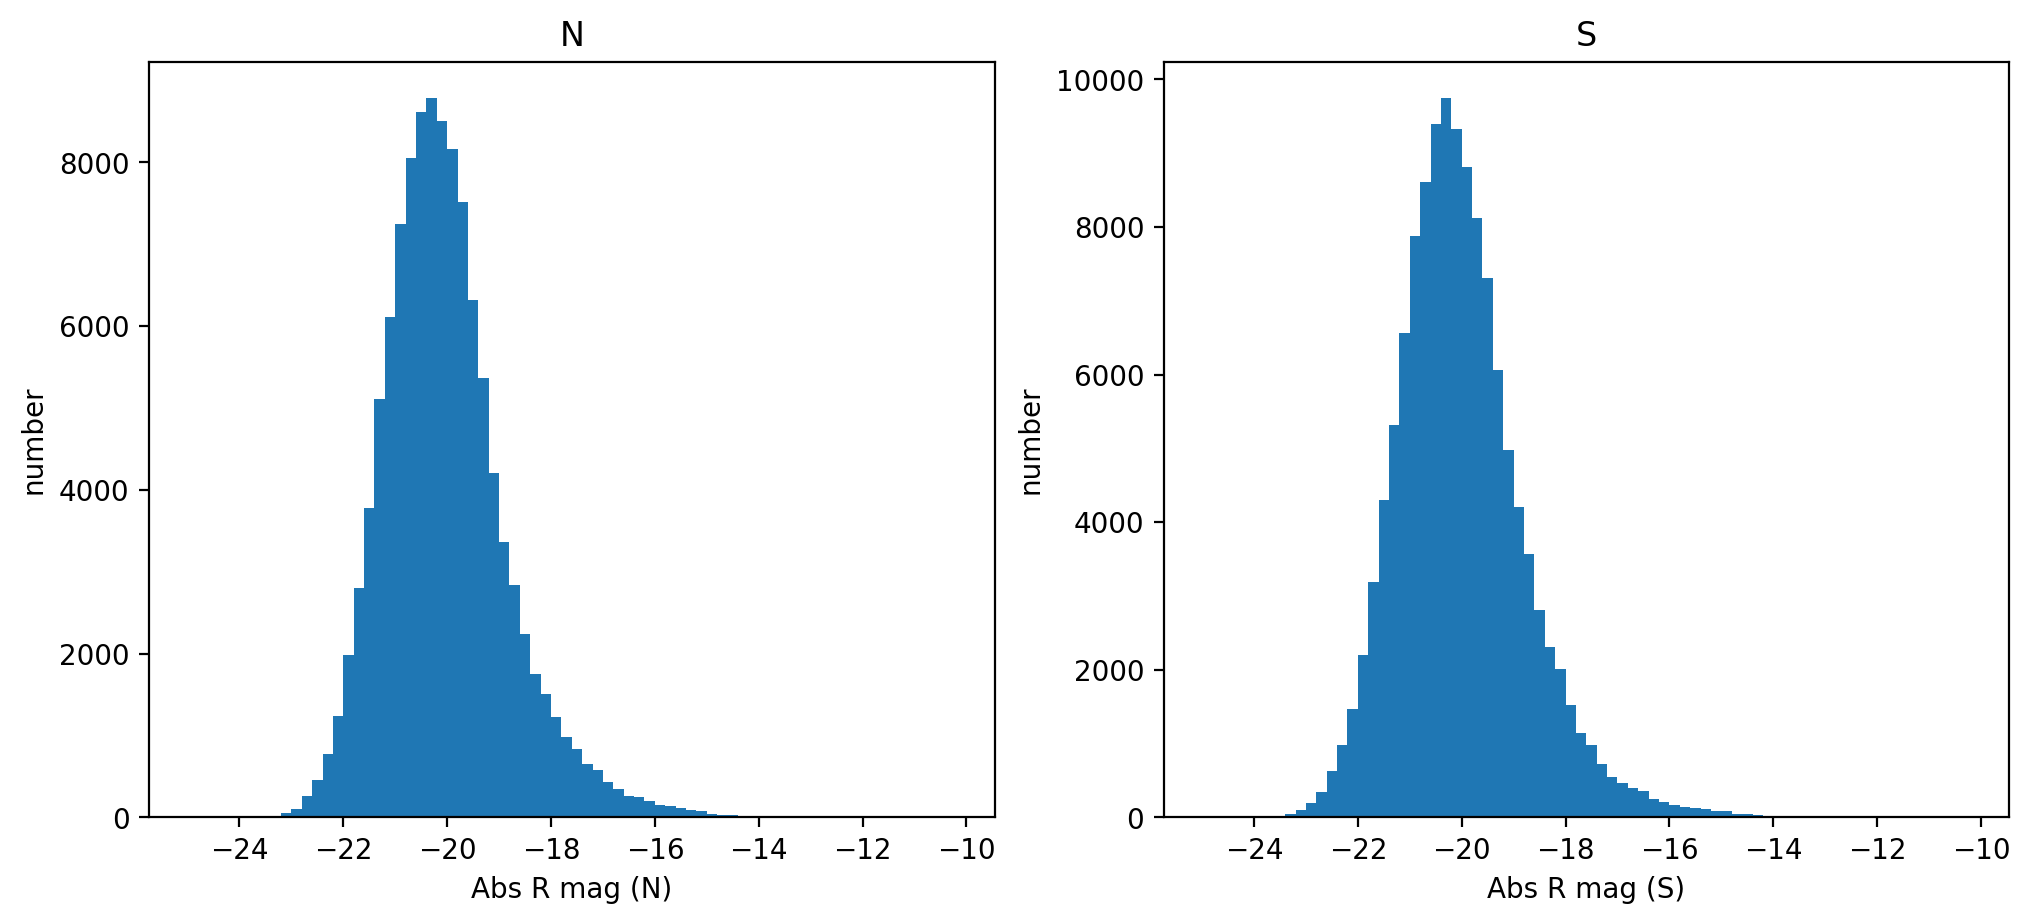

In [10]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-25,-10,0.2)
plt.subplot(121)
plt.title('N')
plt.hist(N['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.title('S')
plt.hist(S['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week3/clustering_abs_rmag_hist')

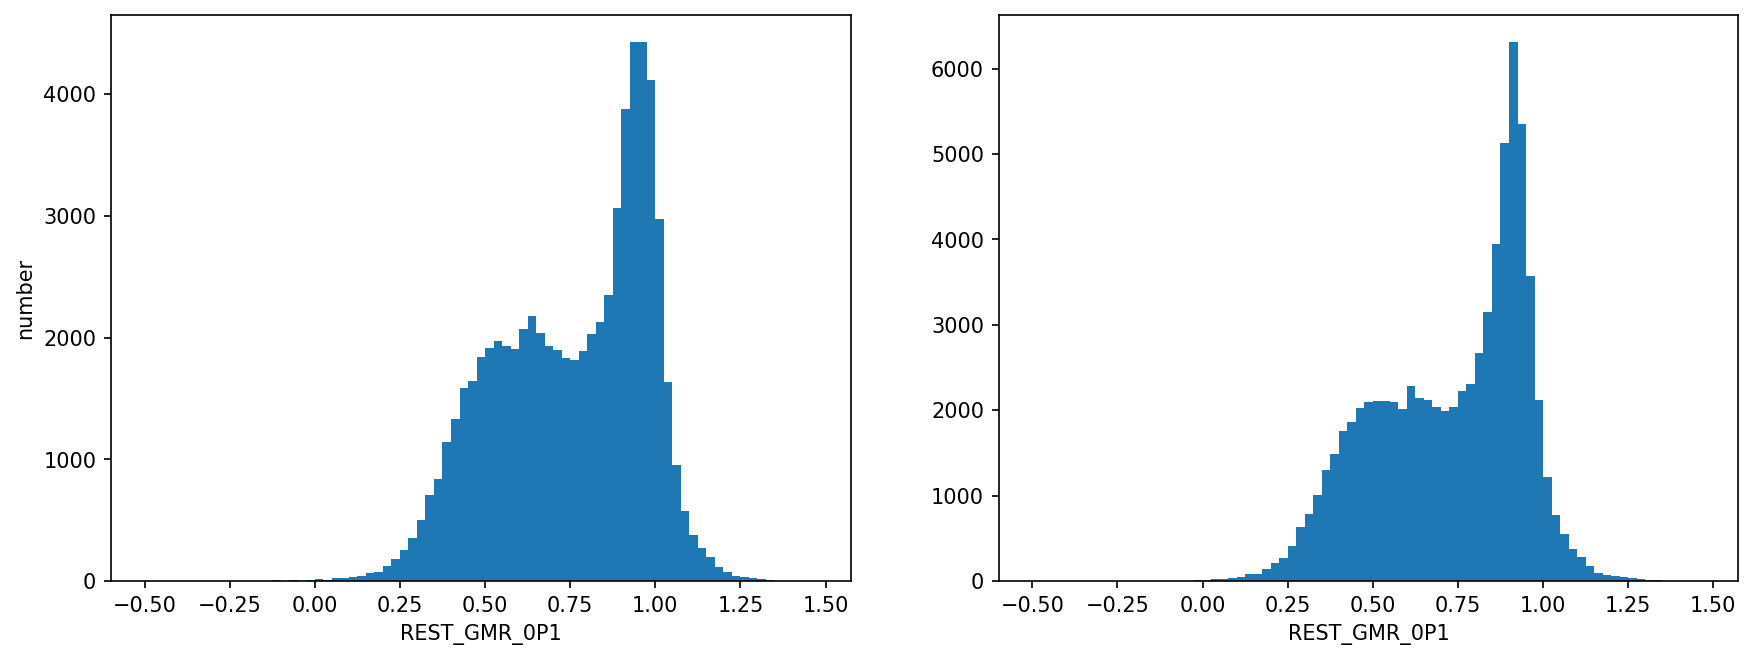

In [60]:
plt.figure(figsize=(14,5),dpi=150)
plt.subplot(121)
plt.hist(N_bright['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('REST_GMR_0P1')
plt.ylabel('number')
plt.subplot(122)
plt.hist(S_bright['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('REST_GMR_0P1')
plt.savefig('../figures/week8-9/sv3_bright_restcolour_hist.png')

In [39]:
N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

N_bright['z_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_z_dered'])
N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
N_bright['g_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_g_dered'])
N_bright['r_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_r_dered'])

S_bright['z_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_z_dered'])
S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])
S_bright['g_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_g_dered'])
S_bright['r_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_r_dered'])

/tmp/ipykernel_6070/3819926912.py:2: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_6070/3819926912.py:7: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
/tmp/ipykernel_6070/3819926912.py:12: RuntimeWarning: invalid value encountered in log10
  N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
/tmp/ipykernel_6070/3819926912.py:17: RuntimeWarning: invalid value encountered in log10
  S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])


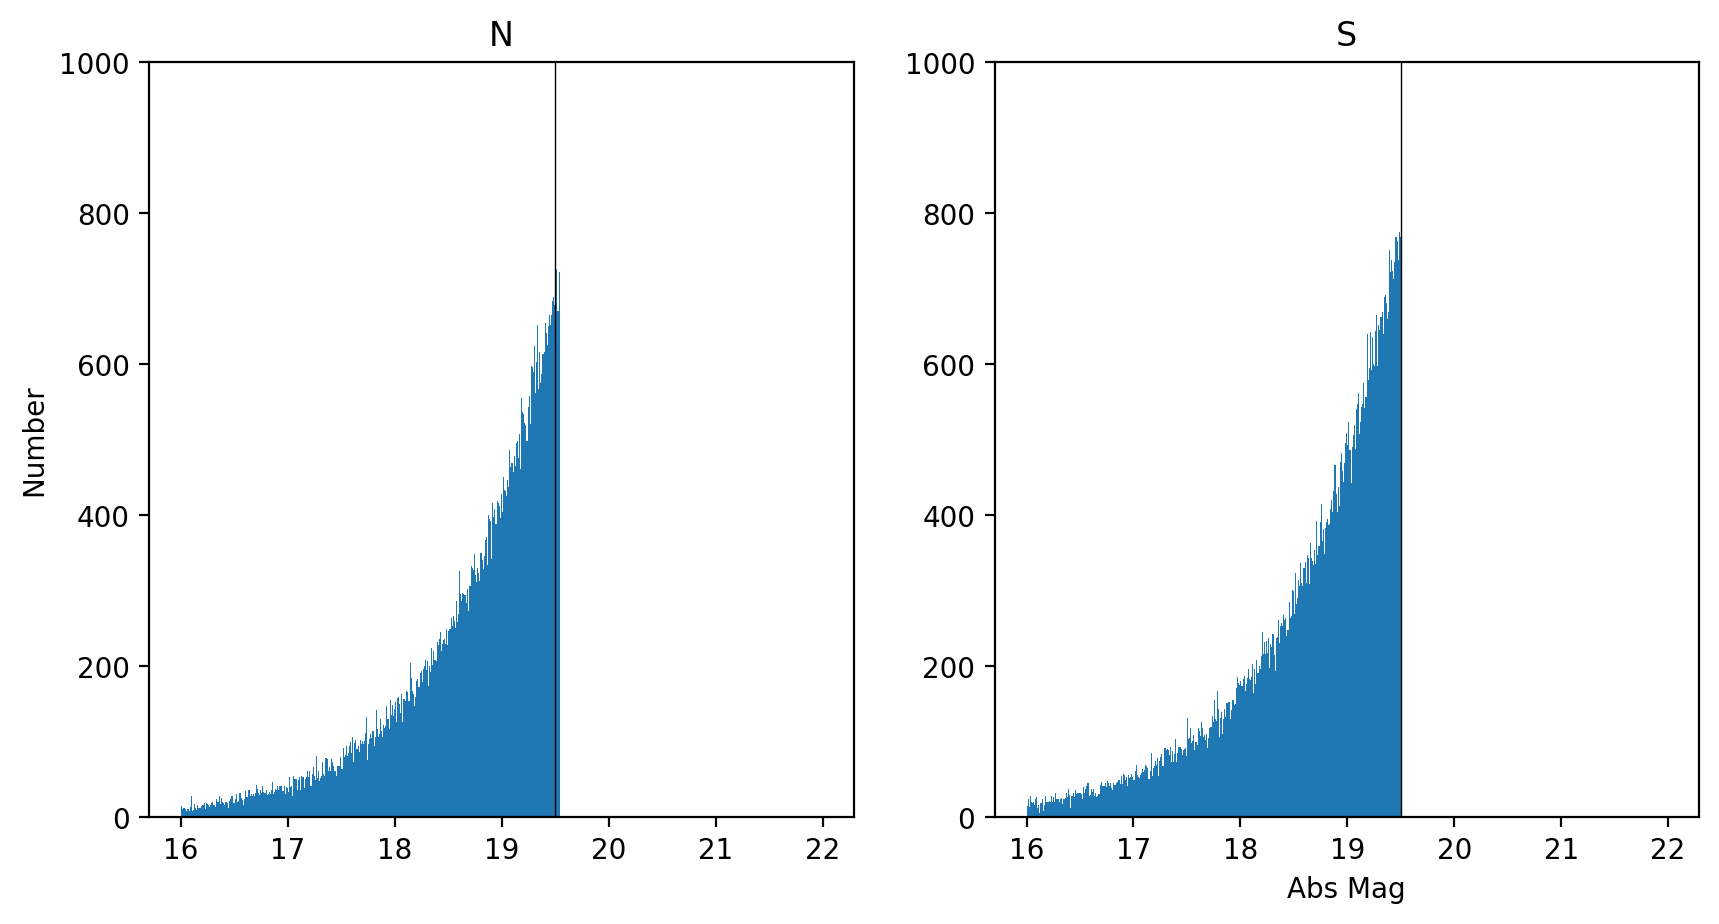

In [43]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N_bright['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S_bright['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,1000)
plt.xlabel('Abs Mag')

plt.show()

Bright limits: N - 19.539993, S - 19.5

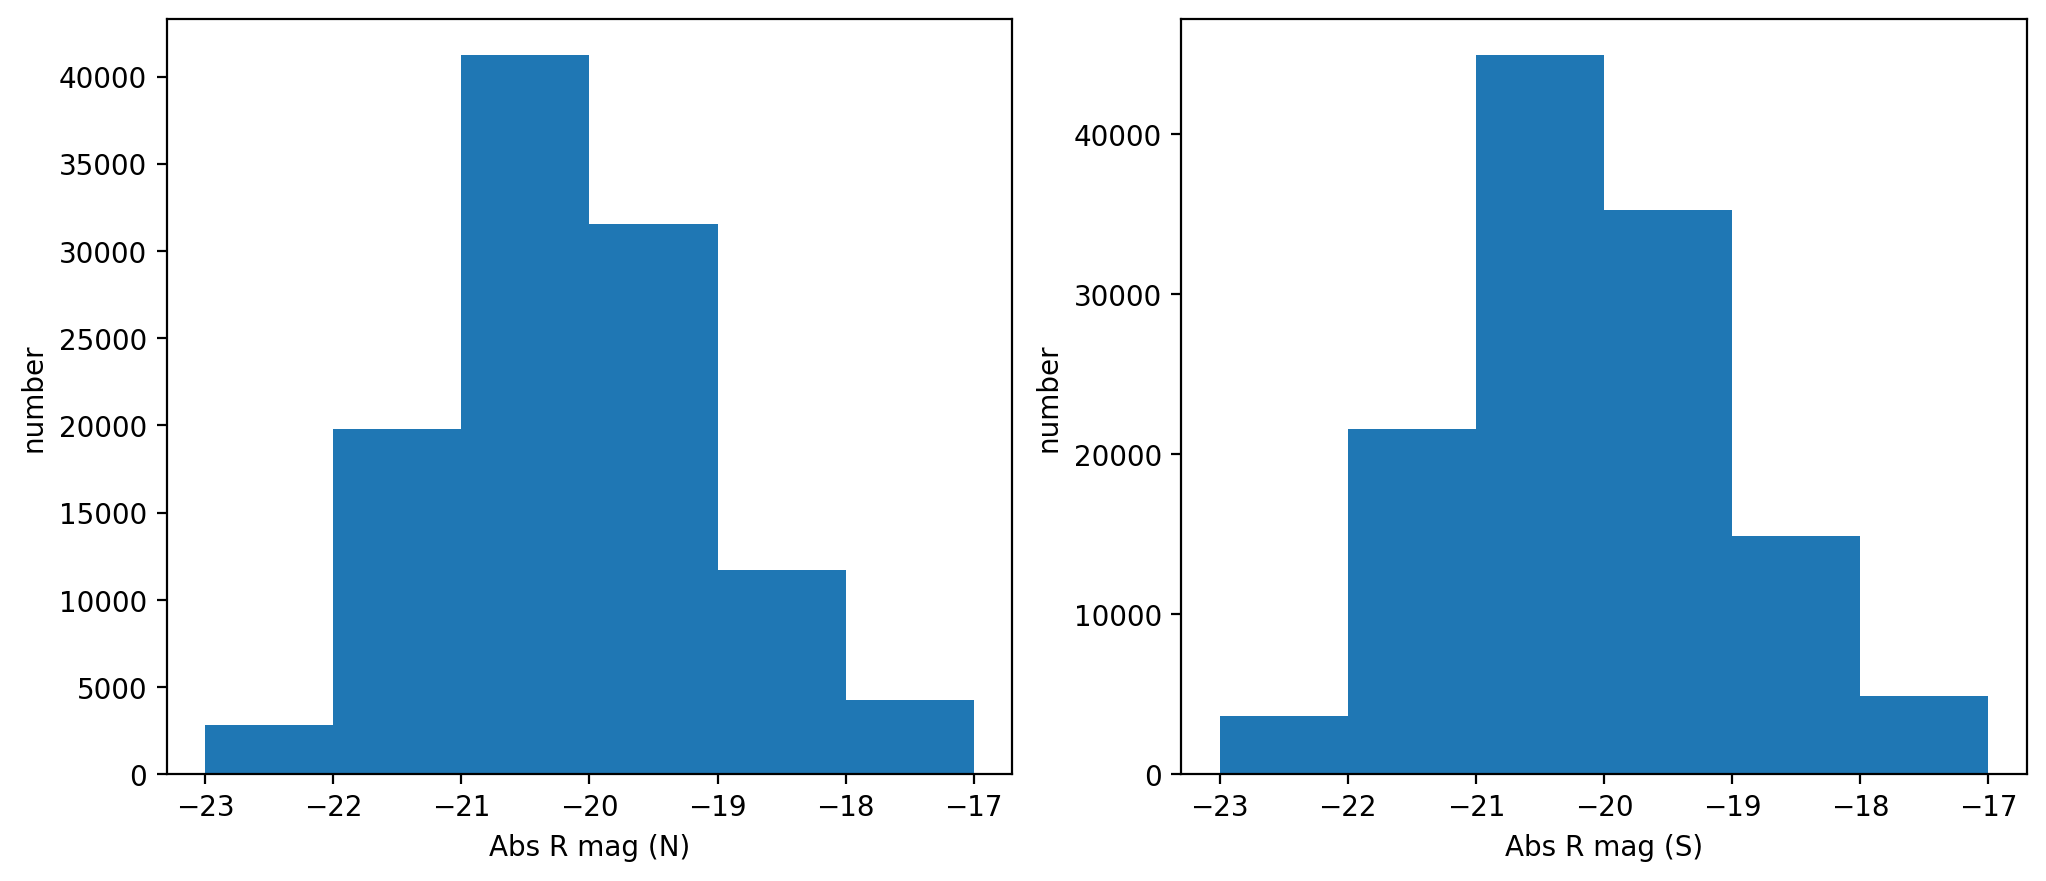

In [11]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-23,-16,1)
plt.subplot(121)
plt.hist(N['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.hist(S['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week6-7/sv3_absmag_maglims.png')


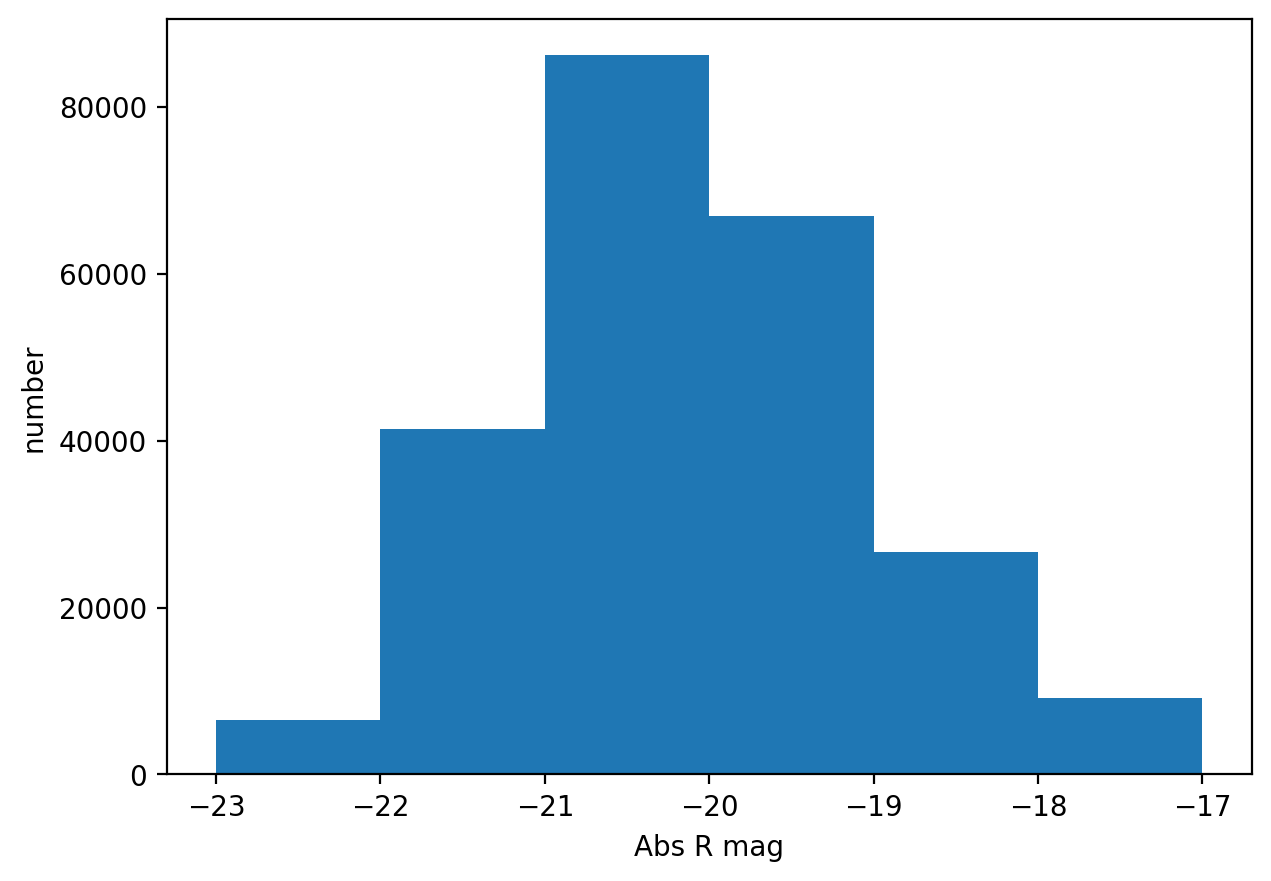

In [12]:
plt.figure(figsize=(7,5),dpi=200)
M_range = np.arange(-23,-16,1)
plt.hist(data['ABSMAG_R'], bins=M_range)
plt.xlabel('Abs R mag')
plt.ylabel('number')

plt.savefig('../figures/week6-7/sv3_absmag_maglims_comb.png')


Finding vmax envelope

In [13]:
M_range = np.arange(-23,-12,0.1)
redshift_cut = np.where(data['Z'] <= 0.3)[0]
redshift_cut_bright = np.where(data_bright['Z'] <= 0.3)[0]
redshift_cut_N = np.where(N['Z'] <= 0.3)[0]
redshift_cut_S = np.where(S['Z'] <= 0.3)[0]

def zmax_G(m):
    return 10**(-(m+22.8)/5.4)

def zmax(m):
    return 10**(-(m+22)/5)

def zmax_bright(m):
    return 10**(-(m+22.9)/5.15)

cosmo = FlatLambdaCDM(H0=100, Om0=0.3) 
zmax_clipped = np.clip(zmax(data['ABSMAG_R']), a_min=None, a_max=0.3)
data['VMAX_EST'] = fsky*cosmo.comoving_volume(zmax_clipped)

#print(data['VMAX_EST']) #too large

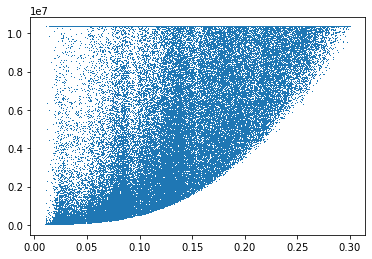

In [14]:
plt.figure()
plt.plot(data['Z'][redshift_cut], data['VMAX_EST'][redshift_cut], lw=0, marker=',')
plt.show()

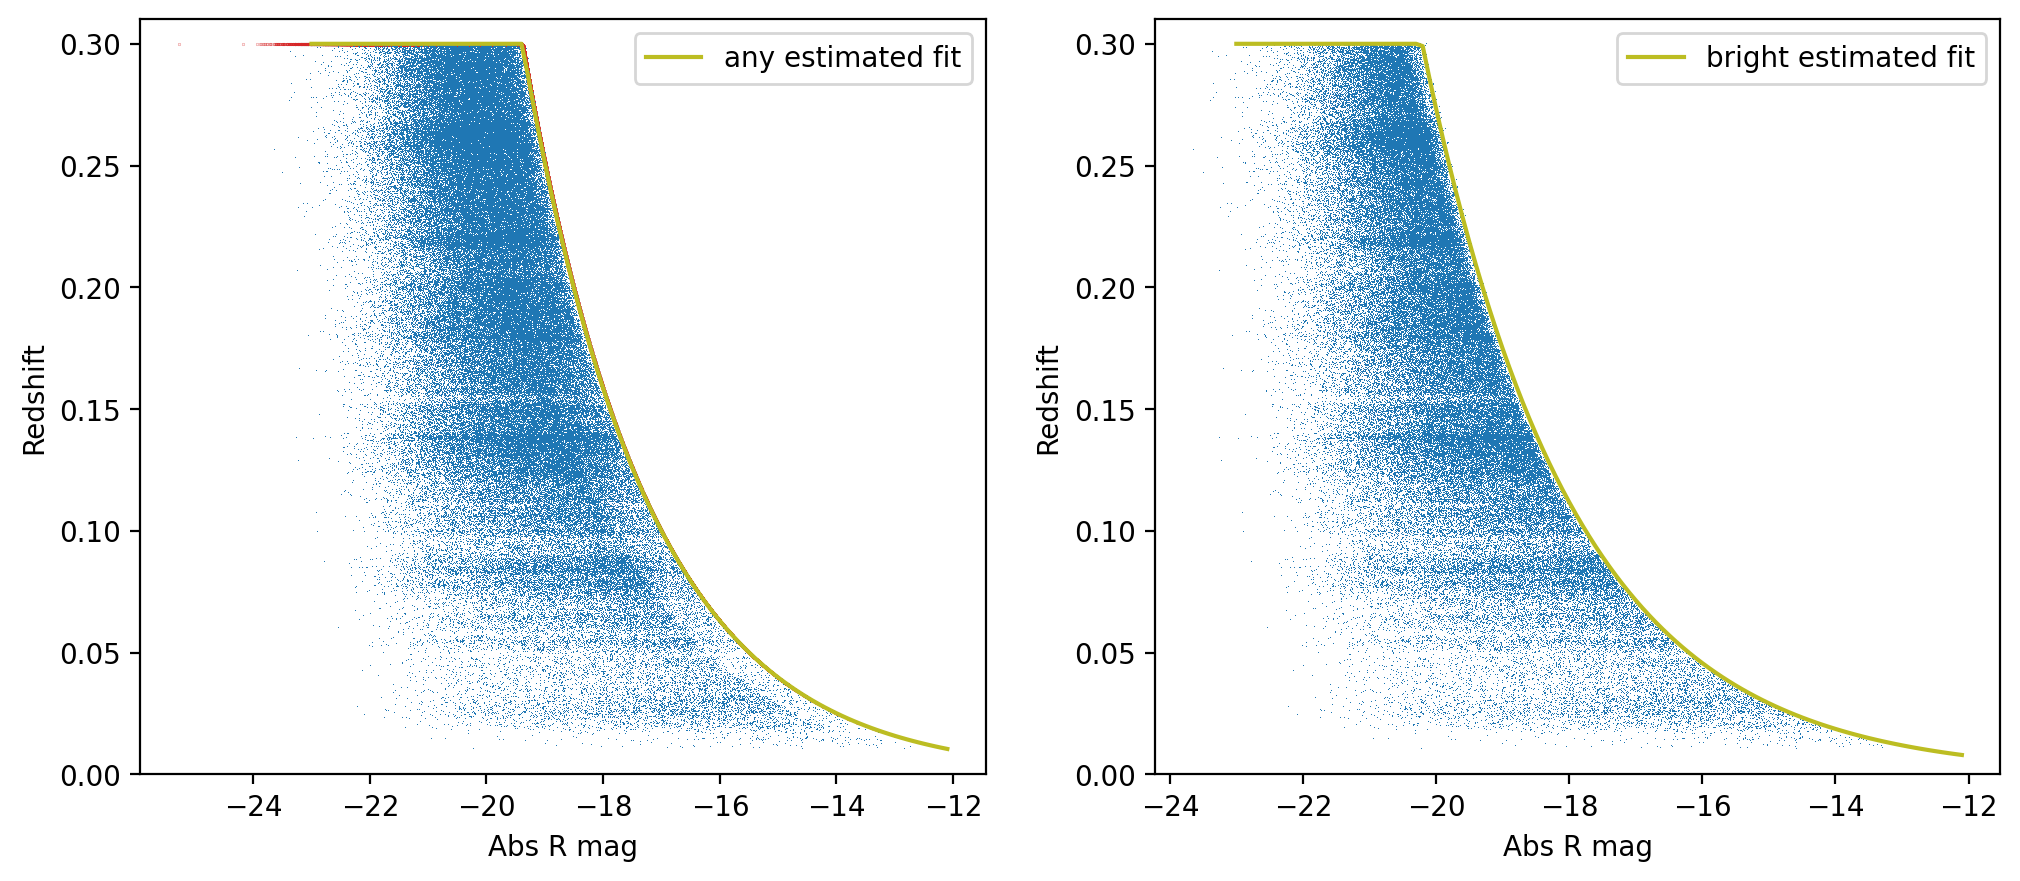

In [15]:
zmax_range = np.clip(zmax(M_range),a_min=None,a_max=0.3)
zmax_range_bright = np.clip(zmax_bright(M_range),a_min=None,a_max=0.3)
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(data['ABSMAG_R'][redshift_cut], data['Z'][redshift_cut], lw=0, marker=',')
#ax.set_yscale('log')
ax1.plot(M_range, zmax_range, label='any estimated fit', color='tab:olive')
ax1.scatter(data['ABSMAG_R'], zmax_clipped, color='tab:red', s=0.01)
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)

ax2 = plt.subplot(122)
ax2.plot(data_bright['ABSMAG_R'][redshift_cut_bright], data_bright['Z'][redshift_cut_bright], lw=0, marker=',')
#ax2.set_yscale('log')
ax2.plot(M_range, zmax_range_bright, label='bright estimated fit', color='tab:olive')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
plt.savefig('../figures/week3/absmag_r_v_redshift_clustering')


Attempt to do k-correction between Sloan and Legacy filters - confused about this

/tmp/ipykernel_67037/229087394.py:8: RuntimeWarning: invalid value encountered in log10
  k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)


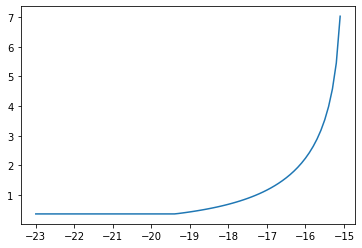

In [16]:
def find_dm(M):
    zmax_clip = np.clip(zmax(M),a_min=None,a_max=0.3)
    zmax_clip_primed = (1 + zmax_clip)/1.04 - 1
    
    dmax = cosmo.comoving_distance(zmax_clip).to_value()
    dmax_primed = cosmo.comoving_distance(zmax_clip_primed).to_value()
    
    k_diff = 5*np.log10(dmax) - 5*np.log10(dmax_primed)
    return k_diff
    
k_diff = find_dm(M_range)

plt.figure()
plt.plot(M_range, k_diff)
plt.show()

(0.0, 0.31)

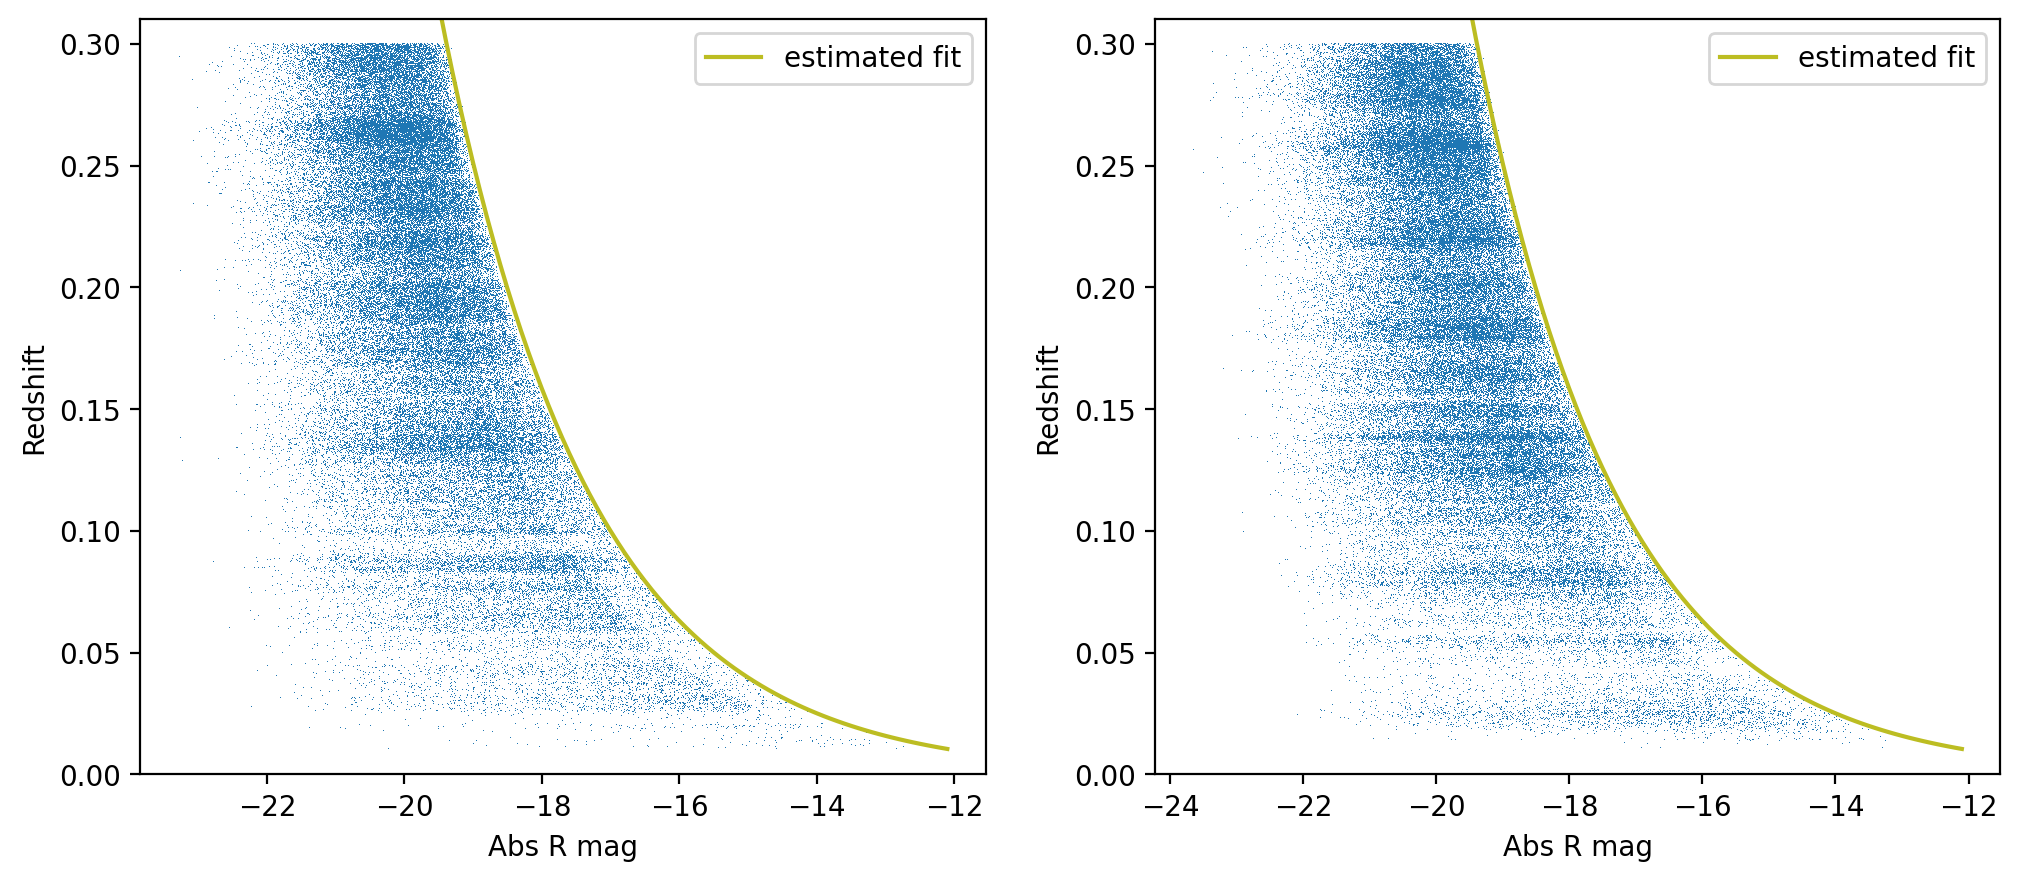

In [17]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(N['ABSMAG_R'][redshift_cut_N], N['Z'][redshift_cut_N], lw=0, marker=',')
#ax.set_yscale('log')
ax1.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
ax2 = plt.subplot(122)
ax2.plot(S['ABSMAG_R'][redshift_cut_S], S['Z'][redshift_cut_S], lw=0, marker=',')
#ax.set_yscale('log')
ax2.plot(M_range, zmax(M_range), label='estimated fit', color='tab:olive')
#ax.plot(data['ABSMAG_R'][redshift_cut], zmax_clipped[redshift_cut], lw=0, marker=',', color='tab:red')
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0,0.31)
#plt.savefig('figures/week3/absmag_r_v_redshift_clustering_N_S')

Already cut to z < 0.6 - also filtered on redshift security?

Use volume envelope to estimate LF - not normalised properly?

In [18]:
def phi(M, phi_star=8.32*10**(-3), M_star=-20.3, alpha=-0.23): #luminosity function
    return np.log(10)*phi_star*10**(0.4*(alpha+1)*(-M+M_star))*np.exp(-10**(0.4*(-M+M_star)))/2.5

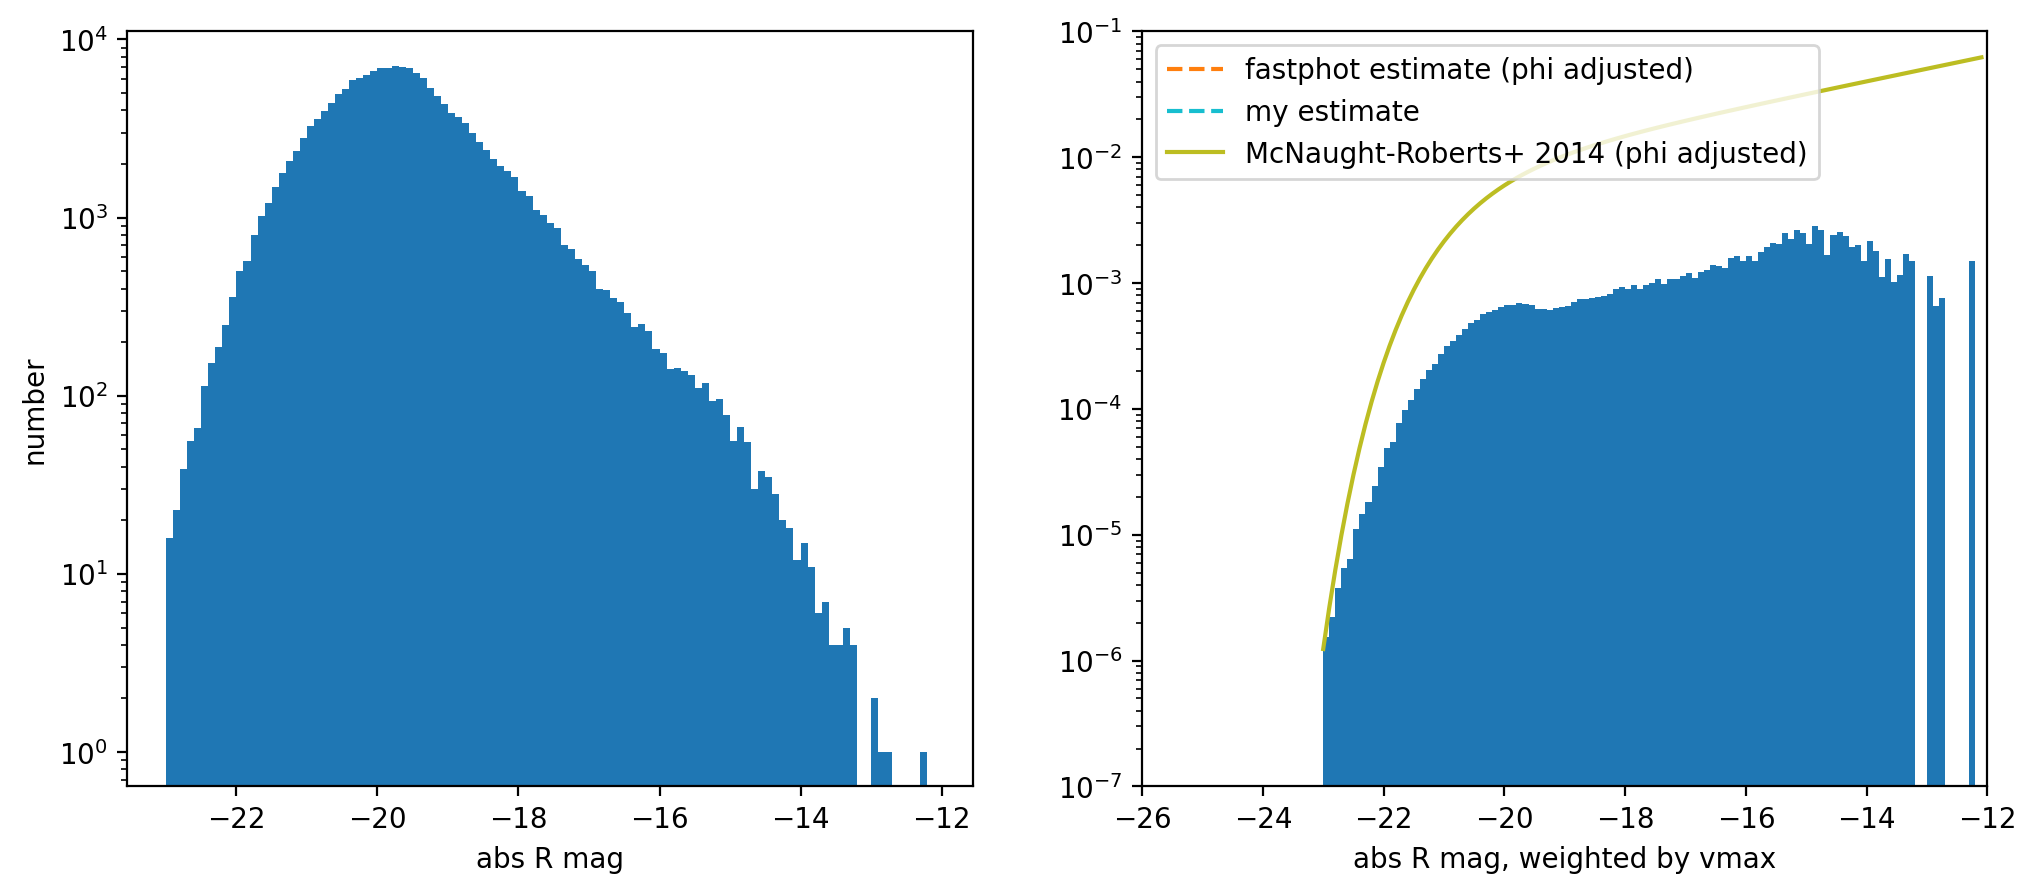

In [19]:
phi_star_est = 0.00000000003
M_star_est = -22 #-21.5#-19.7+5*np.log10(5) for b-band
alpha_est = -1.25 #-1.07

plt.figure(figsize=(12,5),dpi=200)
ax1 = plt.subplot(121)
ax1.hist(data['ABSMAG_R'][redshift_cut], bins=M_range)
ax1.set_yscale('log')
plt.xlabel('abs R mag')
plt.ylabel('number')
ax2 = plt.subplot(122)
ax2.set_yscale('log')
ax2.hist(data['ABSMAG_R'][redshift_cut], bins=M_range, weights=1/data['VMAX_EST'][redshift_cut])
#ax2.plot(M_range, phi(M_range, phi_star=0.000000000015, M_star=-20, alpha=-1.02))
ax2.plot(M_range, phi(M_range, phi_star=0.000000001, M_star=M_star_est, alpha=alpha_est), label='fastphot estimate (phi adjusted)', ls='--')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000013, M_star=-21.3, alpha=alpha_est), label='my estimate', ls='--', color='tab:cyan')
ax2.plot(M_range, phi(M_range, phi_star=0.0000000015, M_star=-20.7, alpha=-1.25), label='McNaught-Roberts+ 2014 (phi adjusted)', color='tab:olive')
ax2.plot(M_range, phi(M_range, phi_star=10**(-2.03), M_star=-20.7, alpha=-1.25), color='tab:olive')
plt.xlabel('abs R mag, weighted by vmax')
plt.ylim(10**-7,10**-1)
plt.xlim(-26,-12)
plt.legend()
#plt.savefig('figures/week3/clustering_abs_rmag_hist_weighted.png')

Other plots: emission line strength vs r mag, sky coverage

In [20]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

data_bright['z_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_z_dered'])
data_bright['w1_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_w1_dered'])
data_bright['g_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_g_dered'])
data_bright['r_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

N_bright['z_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_z_dered'])
N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
N_bright['g_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_g_dered'])
N_bright['r_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_r_dered'])

S_bright['z_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_z_dered'])
S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])
S_bright['g_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_g_dered'])
S_bright['r_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_r_dered'])

/tmp/ipykernel_67037/3691202683.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_67037/3691202683.py:7: RuntimeWarning: invalid value encountered in log10
  data_bright['w1_mag'] = 22.5 - 2.5*np.log10(data_bright['flux_w1_dered'])
/tmp/ipykernel_67037/3691202683.py:12: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_67037/3691202683.py:17: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
/tmp/ipykernel_67037/3691202683.py:22: RuntimeWarning: invalid value encountered in log10
  N_bright['w1_mag'] = 22.5 - 2.5*np.log10(N_bright['flux_w1_dered'])
/tmp/ipykernel_67037/3691202683.py:27: RuntimeWarning: invalid value encountered in log10
  S_bright['w1_mag'] = 22.5 - 2.5*np.log10(S_bright['flux_w1_dered'])


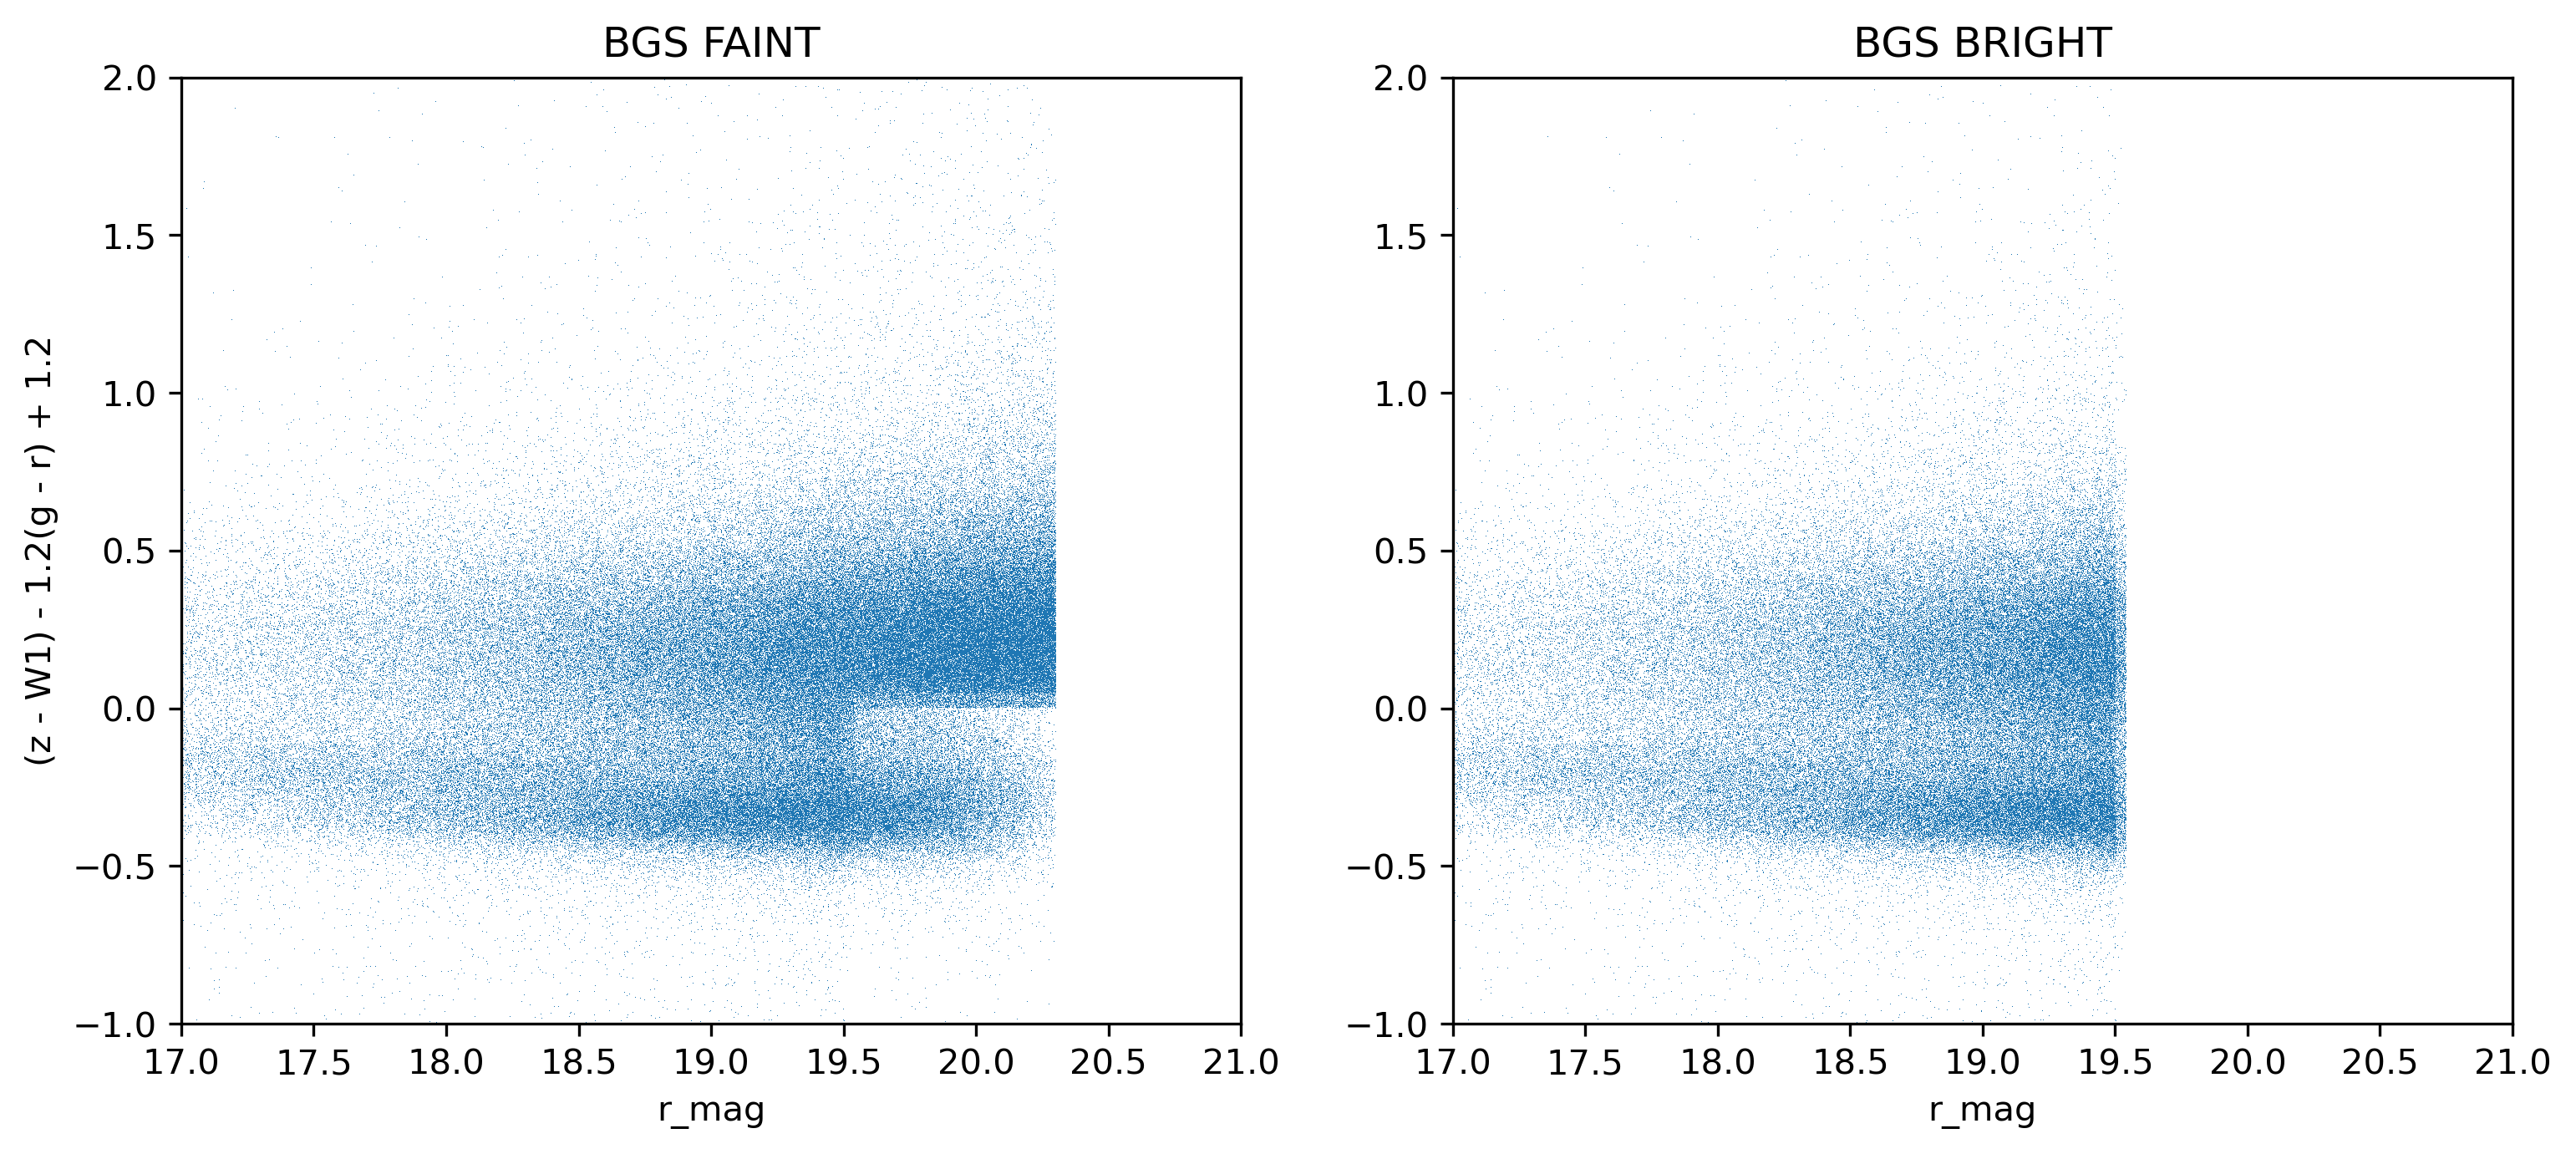

In [21]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
Y_N = (N['z_mag'] - N['w1_mag']) - 1.2*(N['g_mag'] - N['r_mag']) + 1.2
Y_S = (S['z_mag'] - S['w1_mag']) - 1.2*(S['g_mag'] - S['r_mag']) + 1.2
Y_N_bright = (N_bright['z_mag'] - N_bright['w1_mag']) - 1.2*(N_bright['g_mag'] - N_bright['r_mag']) + 1.2
Y_S_bright = (S_bright['z_mag'] - S_bright['w1_mag']) - 1.2*(S_bright['g_mag'] - S_bright['r_mag']) + 1.2
Y_bright = (data_bright['z_mag'] - data_bright['w1_mag']) - 1.2*(data_bright['g_mag'] - data_bright['r_mag']) + 1.2

plt.figure(figsize=(12,5), dpi=300)
plt.subplot(121)
plt.title('BGS FAINT')
plt.plot(N['r_mag'], Y_N, lw=0, marker=',', color='tab:blue')
plt.plot(S['r_mag'], Y_S, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.subplot(122)
plt.title('BGS BRIGHT')
plt.plot(N_bright['r_mag'], Y_N_bright, lw=0, marker=',', color='tab:blue')
plt.plot(S_bright['r_mag'], Y_S_bright, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.xlabel('r_mag')
plt.savefig('../figures/week3/clustering_Fig4.png')

Text(0, 0.5, 'DEC')

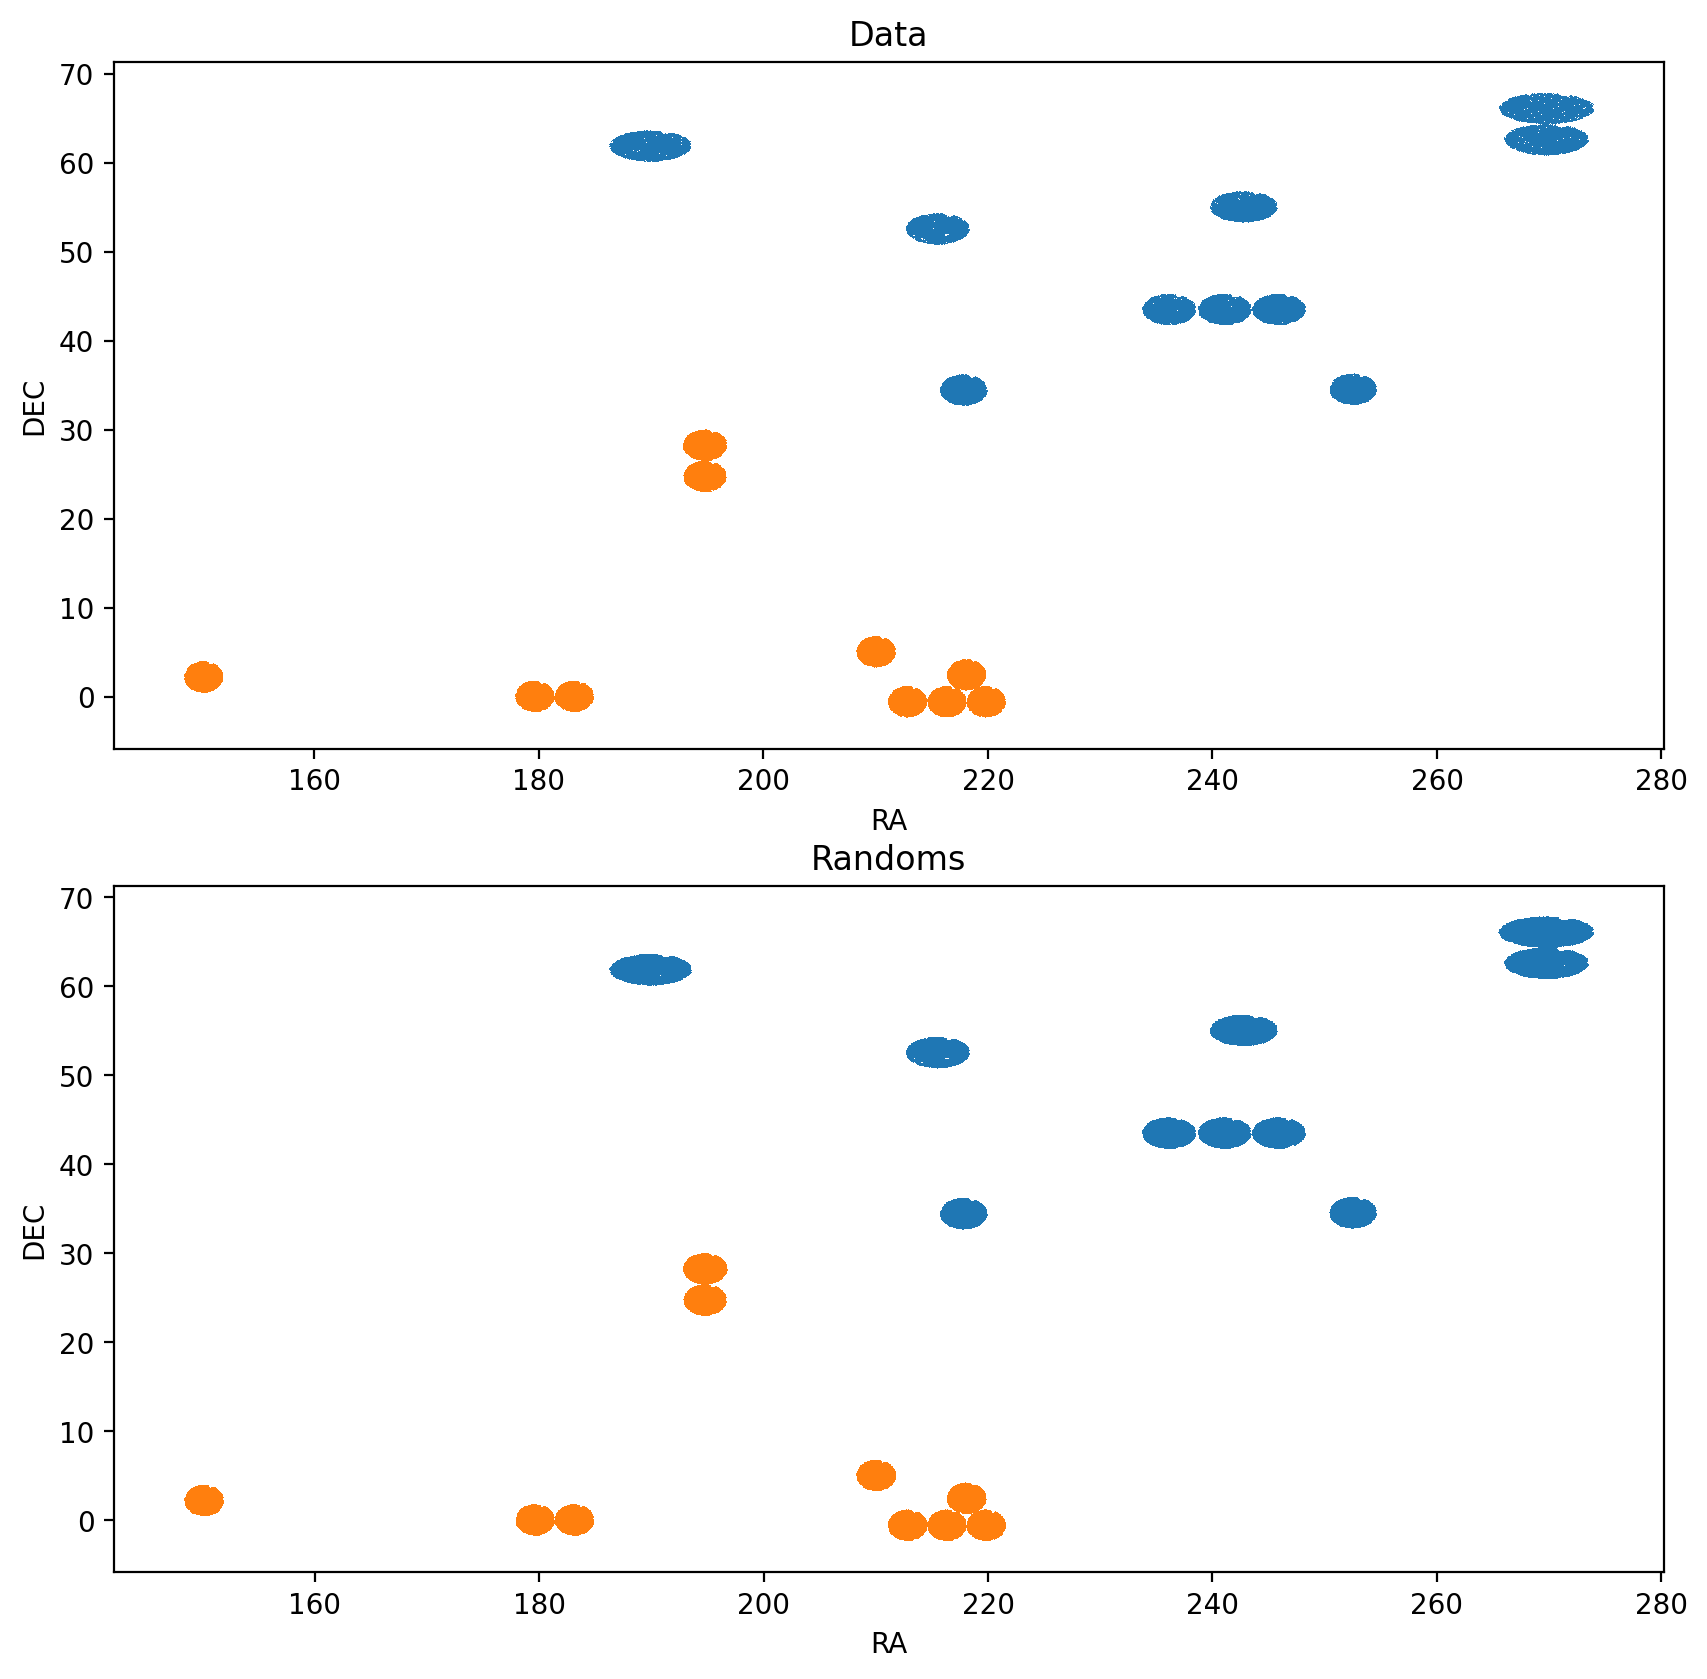

In [22]:
plt.figure(figsize=(10,10), dpi=200)
plt.subplot(211)
plt.title('Data')
plt.plot(N['RA'], N['DEC'], lw=0, marker=',', label='N')
plt.plot(S['RA'], S['DEC'], lw=0, marker=',', label='S')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.subplot(212)
plt.title('Randoms')
plt.plot(N0['RA'], N0['DEC'], lw=0, marker=',')
plt.plot(S0['RA'], S0['DEC'], lw=0, marker=',')
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.savefig('figures/week3/clustering_sky_coverage')

In [23]:
dec_slice = np.where(np.logical_and(data['DEC'] >= 40, data['DEC'] <= 50))[0]
redshift_cut = np.where(data['Z'] <= 0.5)[0]
print(dec_slice, redshift_cut)

cone_cut = np.intersect1d(dec_slice, redshift_cut)
print(cone_cut)

RA_rad = np.deg2rad(data['RA'])

[ 35499  35500  35501 ... 102502 102503 102504] [     0      1      2 ... 241743 241744 241745]
[ 35499  35500  35501 ... 102502 102503 102504]


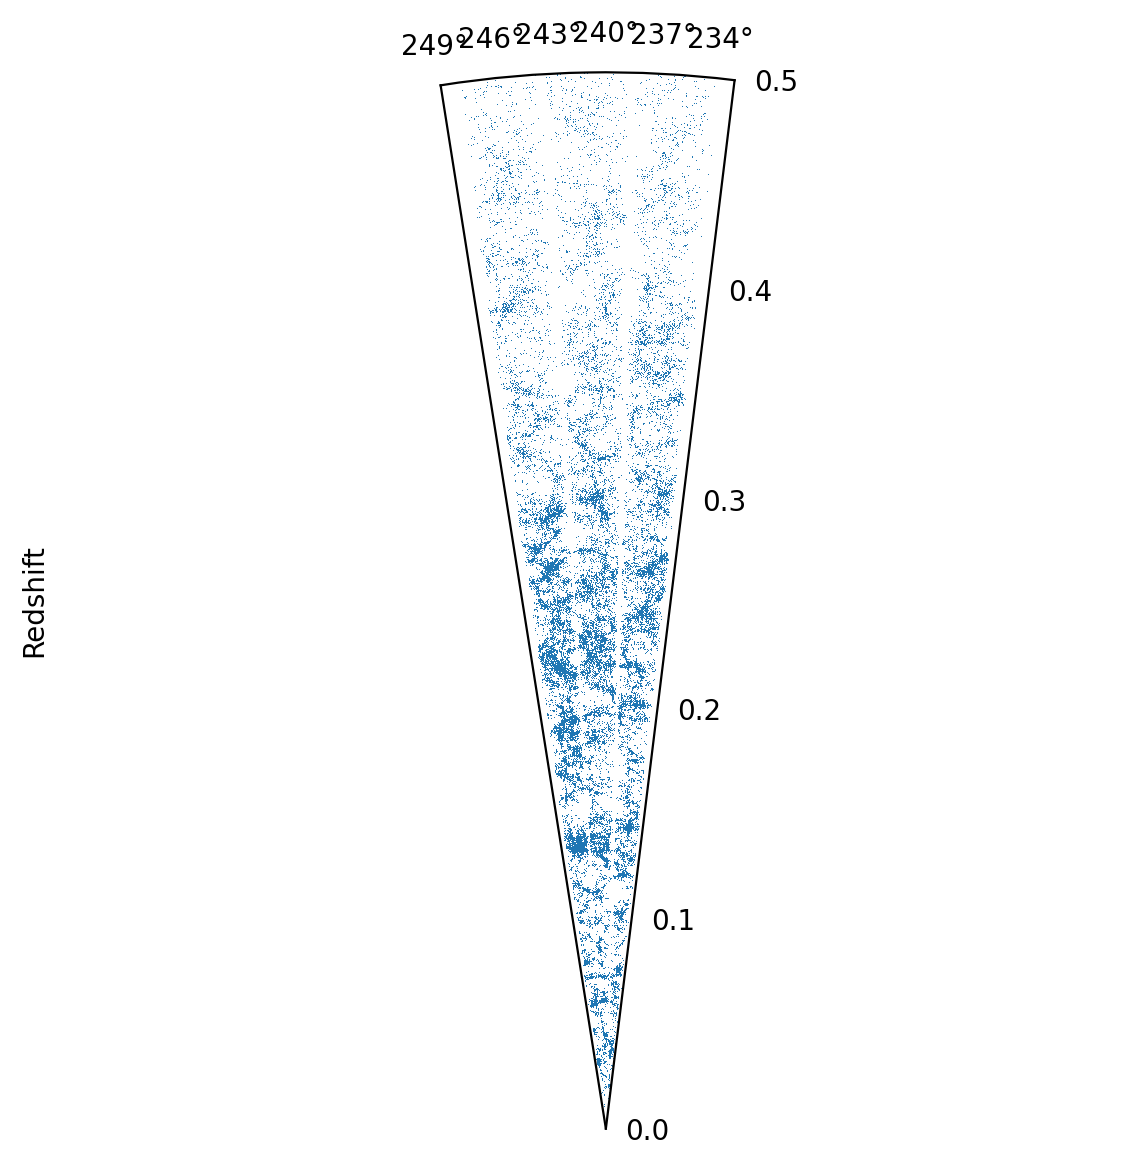

In [24]:
fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': 'polar'}, dpi=200)
plt.grid(False)
ax.plot(RA_rad[cone_cut],data['Z'][cone_cut], lw=0, marker=',', color='tab:blue')
ax.set_theta_offset(np.deg2rad(210))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(233),np.deg2rad(249))
plt.ylabel('Redshift')
plt.savefig('../figures/week8/sv3_cone_plot.png')

Attempt to calculate number density (too low due to large volume?) and FKP weights

In [25]:
def fkp_model(n,p):
    return 1/(1 + n*p)

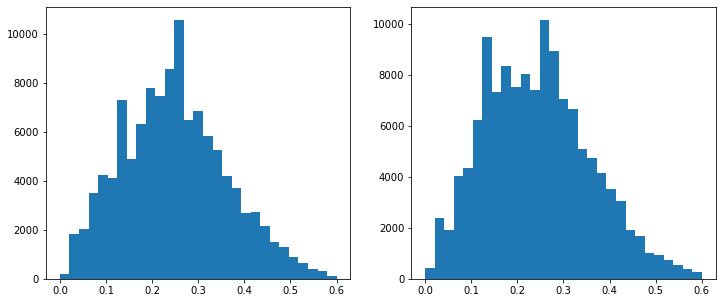

In [26]:
z_bins = np.linspace(0,0.6,30)#np.arange(0,0.61,0.05)
plt.figure(figsize=(12,5))
plt.subplot(121)
count_N = plt.hist(N['Z'], bins=z_bins)
plt.subplot(122)
count_S = plt.hist(S['Z'], bins=z_bins)
plt.show()

In [27]:
number_N = count_N[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
print(np.shape(number_N))
number_N[np.where(number_N==0.0)] = np.nan

number_S = count_S[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
number_S[np.where(number_S==0.0)] = np.nan


(29,)


In [28]:
"""vol_between = []
for i, z in enumerate(z_bins):
    if i==0:
        continue
    vol_between.append( fsky*(cosmo.comoving_volume(z_bins[i]) - cosmo.comoving_volume(z_bins[i-1])).to_value() )

vol_between = np.array(vol_between)
print(vol_between[0:20], np.shape(vol_between), np.shape(number_N))
number_density_N = number_N/vol_between 
number_density_S = number_S/vol_between """


#code to do this already?

def find_number_density(data, z_b):
    count = plt.hist(data['Z'], bins=z_b)
    number= count[0] #taget counts in redshift bins size 0.1 from 0.1 <= z <= 0.6
    number[np.where(number==0.0)] = np.nan
    
    vol_between = []
    for i, z in enumerate(z_b):
        if i==0:
            continue
        vol_between.append( fsky*(cosmo.comoving_volume(z_b[i]) - cosmo.comoving_volume(z_b[i-1])).to_value() )

    vol_between = np.array(vol_between)
    number_density = number/vol_between 
    return number_density

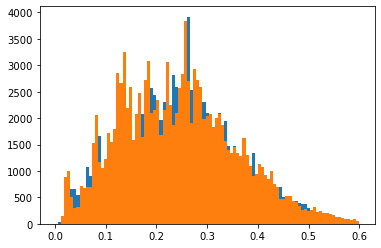

In [29]:
z_bins = np.linspace(0,0.6,100)#np.arange(0,0.61,0.05)
n_N = find_number_density(N, z_bins)
n_S = find_number_density(S, z_bins)

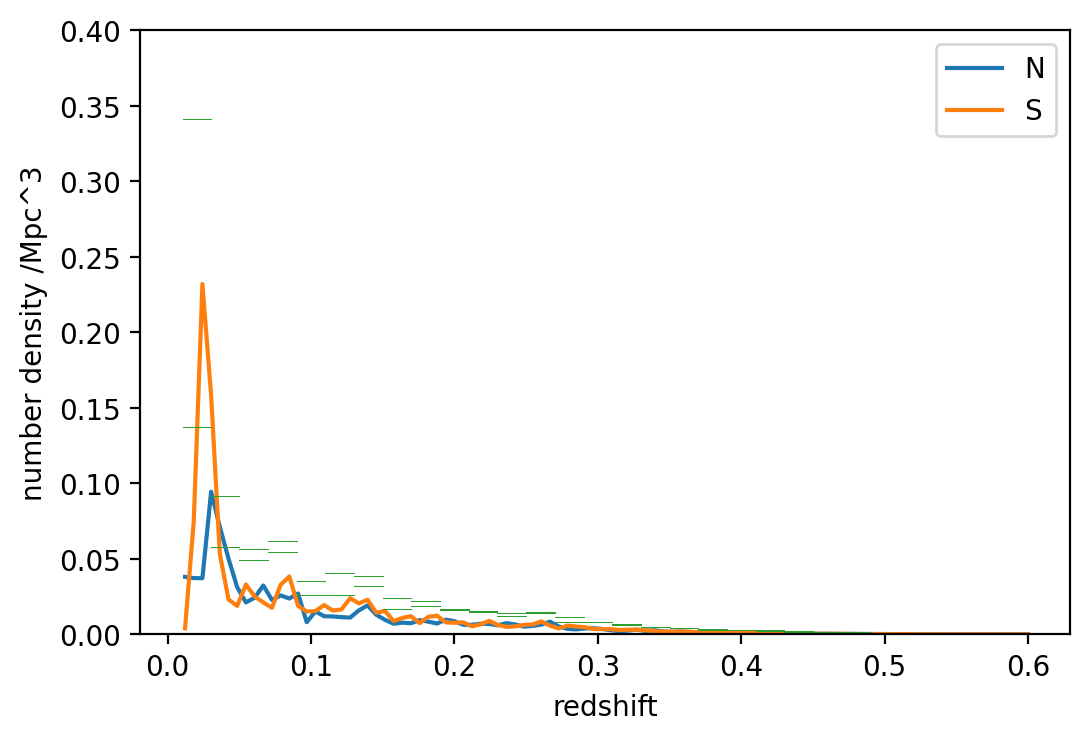

In [42]:
plt.figure(dpi=200)
plt.plot(z_bins[1:], n_N, label='N')
plt.plot(z_bins[1:], n_S, label='S')
plt.xlabel('redshift')
plt.ylabel('number density /Mpc^3')
plt.ylim(0,0.4)
plt.legend()
plt.plot(data['Z'], data['NZ'], lw=0, marker=',')
plt.savefig('../figures/week3/number_density.png')
#magnitude cuts?

Text(0, 0.5, 'number density h/Mpc^3')

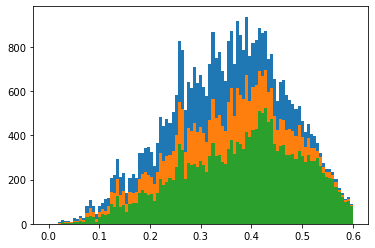

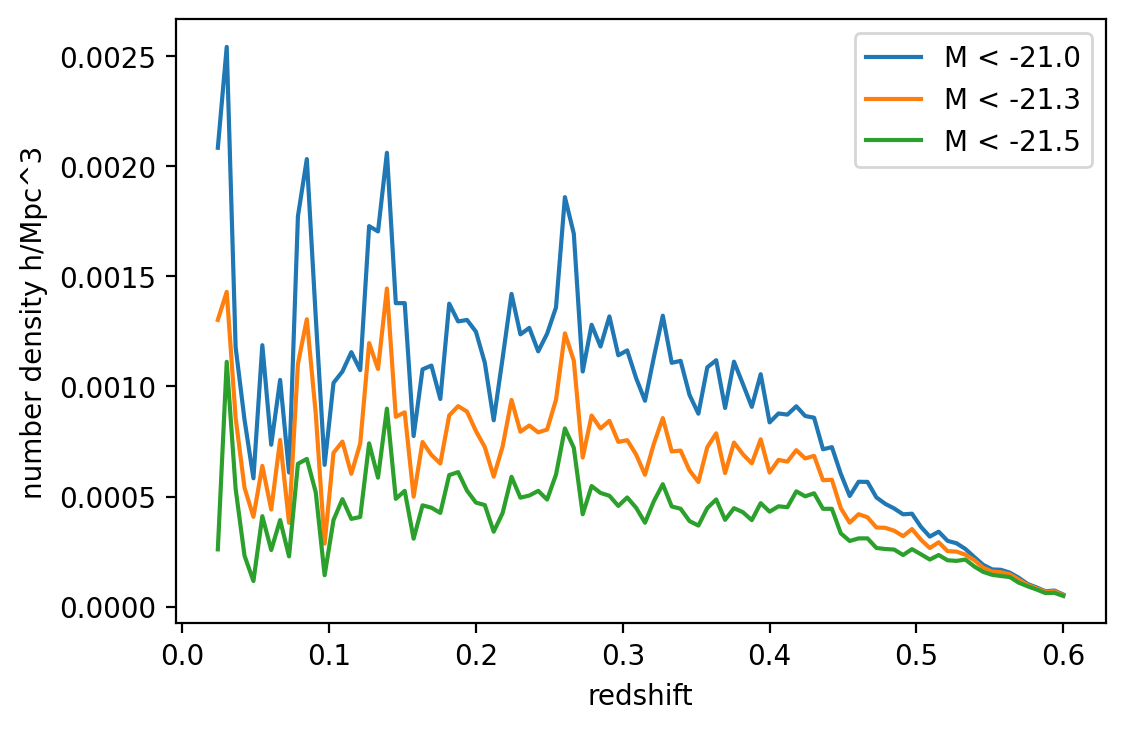

In [31]:
maglim_211 = np.where(data['ABSMAG_R'] < -21.1)[0]
n_211 = find_number_density(data[maglim_211], z_bins)
maglim_213 = np.where(data['ABSMAG_R'] < -21.3)[0]
n_213 = find_number_density(data[maglim_213], z_bins)
maglim_215 = np.where(data['ABSMAG_R'] < -21.5)[0]
n_215 = find_number_density(data[maglim_215], z_bins)

plt.figure(dpi=200)
plt.plot(z_bins[1:], n_211, label='M < -21.0')
plt.plot(z_bins[1:], n_213, label='M < -21.3')
plt.plot(z_bins[1:], n_215, label='M < -21.5')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('number density h/Mpc^3')
#plt.savefig('figures/week3/number_density_maglim.png')

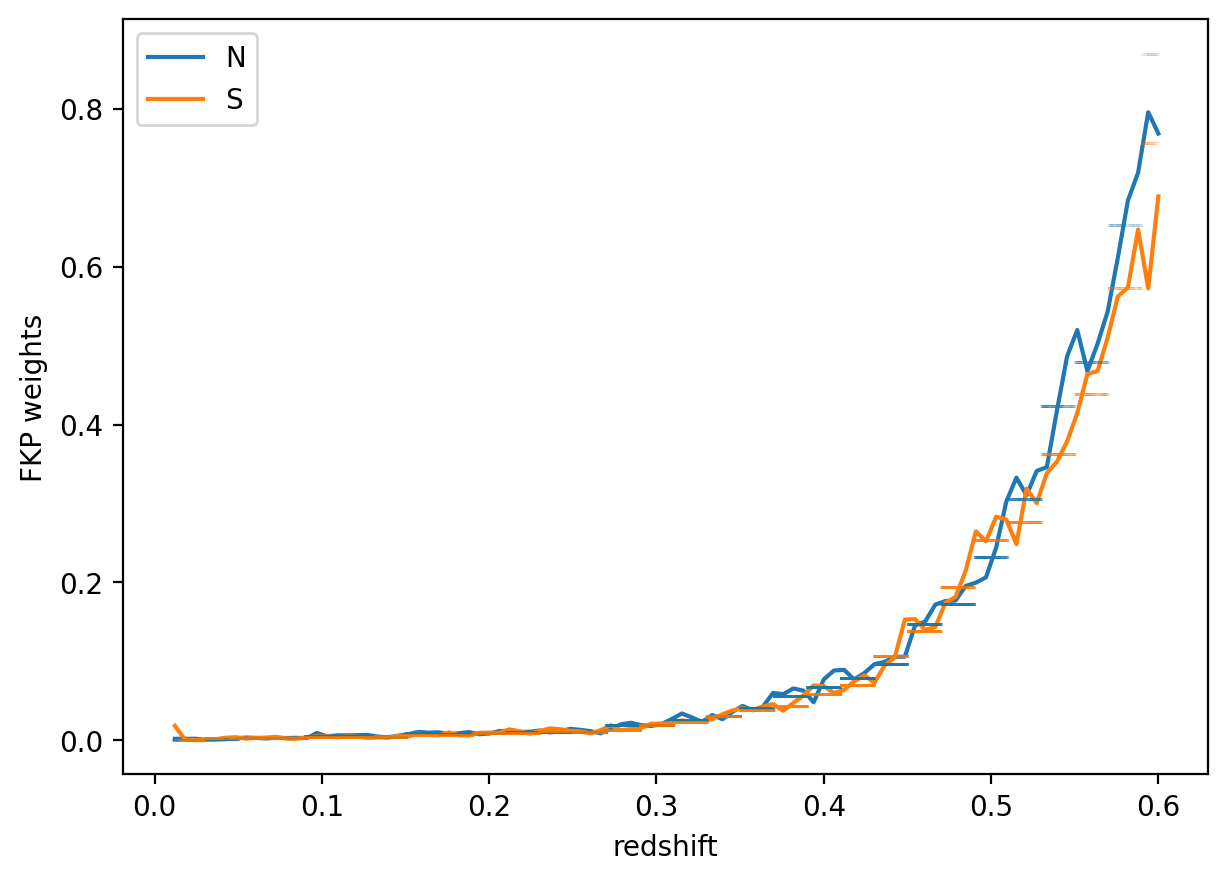

In [32]:
fkp_model_weights_N = fkp_model(n_N, 13000) #suggested:80000 6500000000 80000**2 H0=100:60000
fkp_model_weights_S = fkp_model(n_S, 13000) #depends on no of bins - currently 30 (counted apparent no. data bins)

fig, ax = plt.subplots(figsize=(7,5),dpi=200)
plt.plot(z_bins[1:],fkp_model_weights_N, label='N', color='tab:blue')
plt.plot(z_bins[1:],fkp_model_weights_S, label='S', color='tab:orange')
plt.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=0.01, color='tab:blue')
plt.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=0.01, color='tab:orange')
plt.xlabel('redshift')
plt.ylabel('FKP weights')
#ax.set_yscale('log')
plt.legend()
#plt.savefig('figures/week3/fkpweight_v_redshift.png')
#N and S different

In [21]:
def absmag_lim(lim0, lim1, cat):
    return np.where(np.logical_and(cat['ABSMAG_R'] < lim0, cat['ABSMAG_R'] > lim1))

def redshift_lim(lim, cat): #obsolete
    return np.where(cat['Z'] < np.minimum(zmax(lim),0.6)) 

def redshift_lim_bright(lim, cat): #obsolete
    return np.where(cat['Z'] < np.minimum(zmax_bright(lim),0.6))

def redshift_lim_from_k(lim0, lim1, cat):
    """
    Returns: indices where cat is within the bright and faint absolute magnitude limits, calculated by k+e correction, between lim0 and lim1
    Given global variable z_range, faintlim_range_S and _N_max, brightlim_range_min (which are the polynomials calculated)
    """
    N_i = np.where(cat['APPLIM'] == 19.539993)
    S_i = np.where(cat['APPLIM'] == 19.5)
    cat['ZLIM_UPPER'][S_i] = z_range[find_nearest(faintlim_range_S_max,lim0)]
    cat['ZLIM_UPPER'][N_i] = z_range[find_nearest(faintlim_range_N_max,lim0)]

    upper_limed = np.where(cat['Z'] < np.minimum(cat['ZLIM_UPPER'],0.6))
    z_lim_lower = z_range[find_nearest(brightlim_range_min,lim1)]
    return np.intersect1d(upper_limed, np.where(cat['Z'] > z_lim_lower))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

M_range = np.arange(-23,-16,0.01)

In [22]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3) 
data['DL'] = cosmo.luminosity_distance(np.array(data['Z']))
data['ABSMAG_LIM'] = data['APPLIM'] - 5*np.log10(data['DL'])-25-data['KCORR_R0P1']-data['EQ_ALL_0P1']

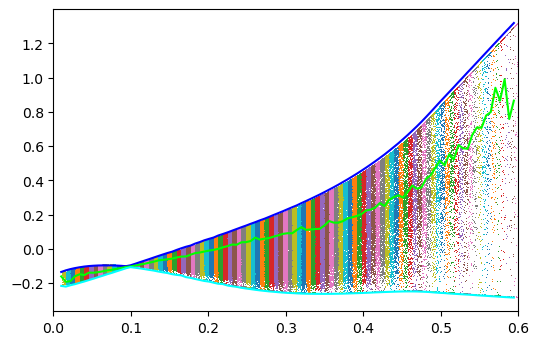

In [23]:
plt.figure(dpi=100)
def find_k(z_range, stat):
    if isinstance(z_range, np.ndarray):
        k = np.empty(len(z_range)-1)
        for i, z in enumerate(z_range):
            if i == len(z_range)-1:
                break
            z_close = np.where(np.logical_and(data['Z'] > (z), data['Z'] < (z_range[i+1])))[0]
            plt.plot(data['Z'][z_close], data['KCORR_R0P1'][z_close], lw=0, marker=',')
            if stat == 'med':
                k[i] = np.median(data['KCORR_R0P1'][z_close])
            elif stat == 'max':
                k[i] = np.amax(data['KCORR_R0P1'][z_close])
            elif stat == 'min':
                k[i] = np.amin(data['KCORR_R0P1'][z_close])
        return k


z_range = np.linspace(0.01,0.6,100)        
k_med = find_k(z_range, 'med') 
k_max = find_k(z_range, 'max')
k_min = find_k(z_range, 'min')
plt.plot(z_range[0:-1], k_max, color='blue')
plt.plot(z_range[0:-1], k_med, color='lime')
plt.plot(z_range[0:-1], k_min, color='aqua')

plt.xlim(0,0.6)
plt.show()

In [29]:
z1 = find_nearest(data['Z'], 0.2)
z2 = find_nearest(data['Z'], 0.4)
e_slope = (data['EQ_ALL_0P1'][z2] - data['EQ_ALL_0P1'][z1])/(data['Z'][z2] - data['Z'][z1])
print(data['Z'][z2], data['EQ_ALL_0P1'][z2])
print(data['Z'][z1], data['EQ_ALL_0P1'][z1])
print(e_slope)

e_intercept = data['EQ_ALL_0P1'][z2] - e_slope*data['Z'][z2]
print(e_intercept)
#y = mx+c

dl_range = cosmo.luminosity_distance(z_range[0:-1]).to_value()
e_z = e_slope*z_range[0:-1] + e_intercept
faintlim_range_N_max = 19.539993 - 5*np.log10(dl_range) - 25 - k_max - e_z
faintlim_range_S_max = 19.5  - 5*np.log10(dl_range) - 25 - k_max - e_z

faintlim_range_N_min = 19.539993 - 5*np.log10(dl_range) - 25 - k_min - e_z
faintlim_range_S_min = 19.5  - 5*np.log10(dl_range) - 25 - k_min - e_z

faintlim_range_N_med = 19.539993 - 5*np.log10(dl_range) - 25 - k_med - e_z
faintlim_range_S_med = 19.5  - 5*np.log10(dl_range) - 25 - k_med - e_z

brightlim_range_max = 15 - 5*np.log10(dl_range) - 25 - k_max - e_z
brightlim_range_min = 15 - 5*np.log10(dl_range) - 25 - k_min - e_z
brightlim_range_med = 15 - 5*np.log10(dl_range) - 25 - k_med - e_z

0.3999997918202924 -0.3879997980656836
0.1999993699557075 -0.19399938885703627
-0.9699999999999999
0.0


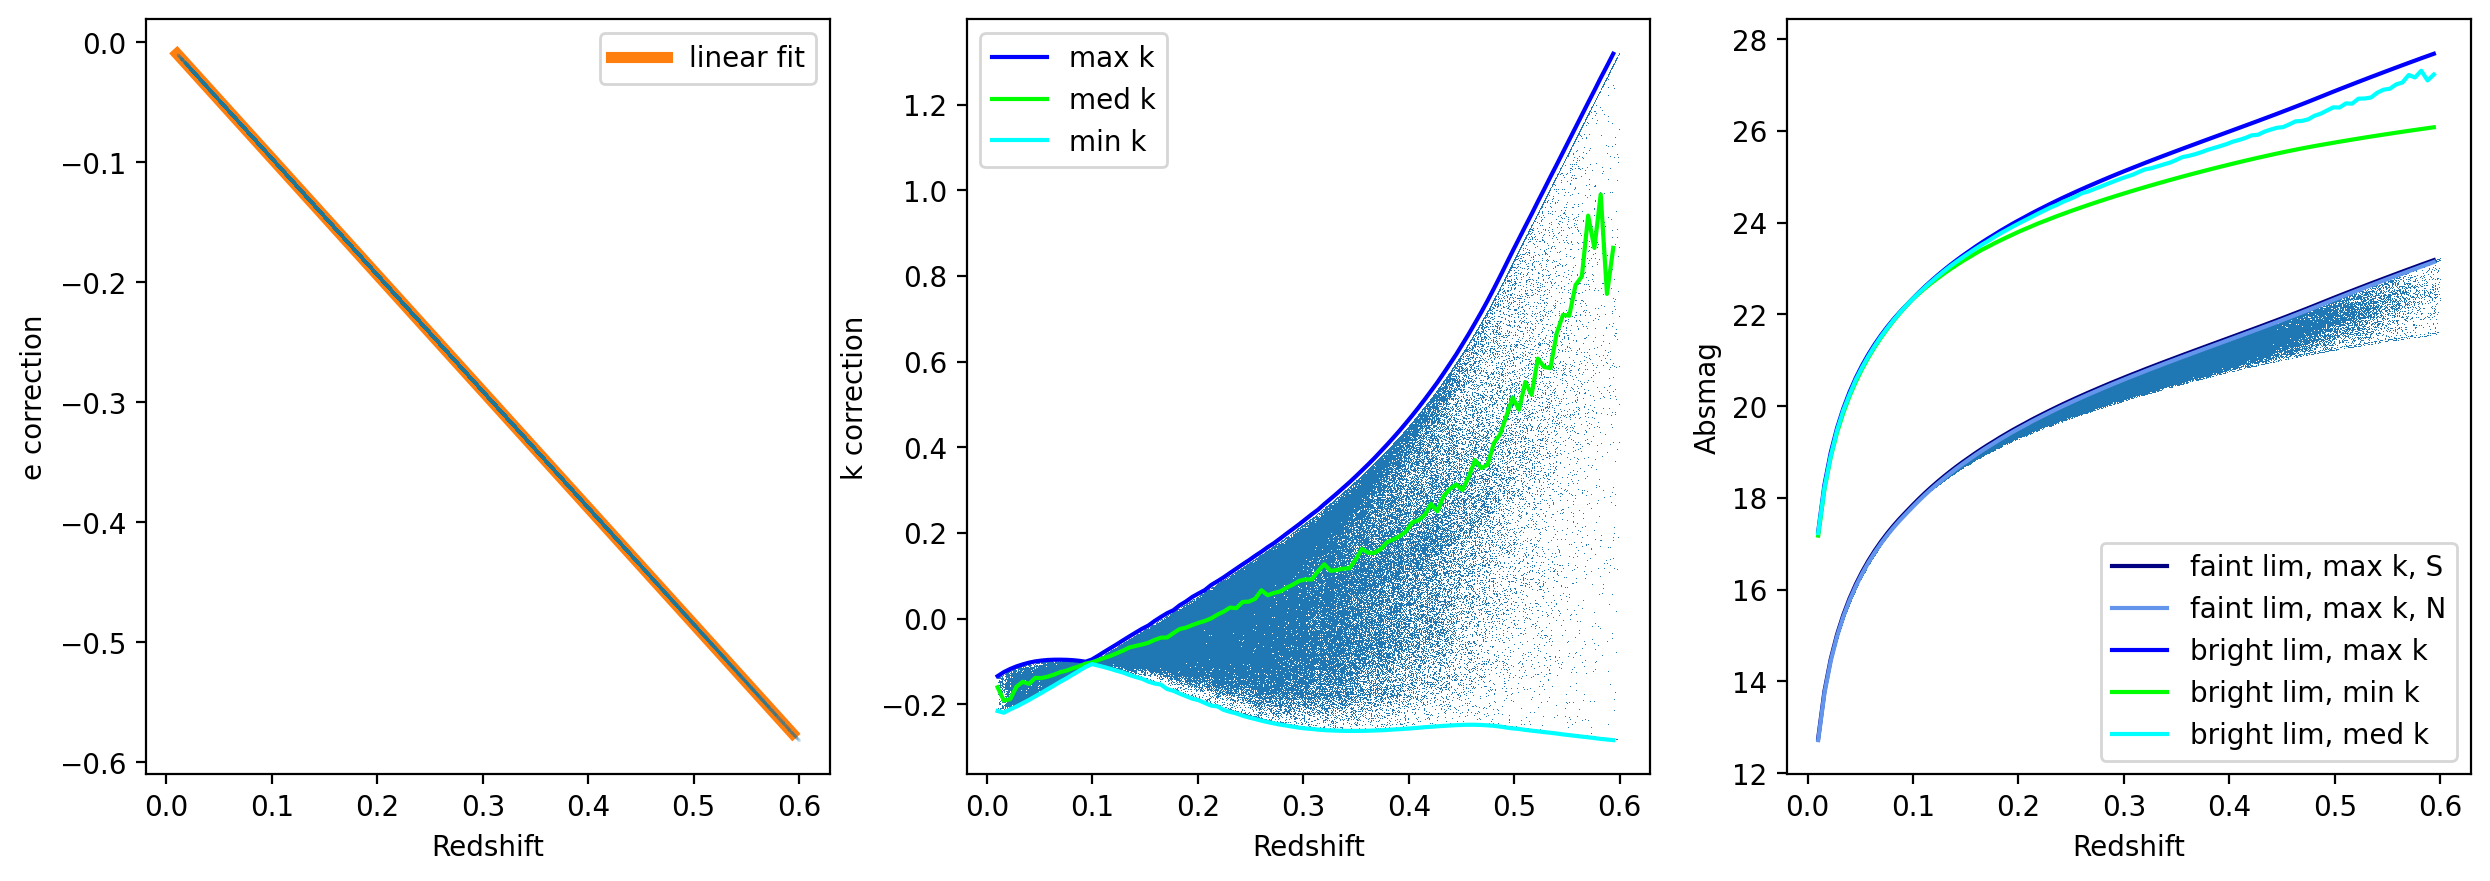

In [30]:
plt.figure(figsize=(15,5), dpi=200)

plt.subplot(131)
plt.plot(z_range[0:-1], e_z, label='linear fit', color='tab:orange', lw=4)
plt.plot(data['Z'], data['EQ_ALL_0P1'], lw=0, marker='o', color='tab:blue', markersize=0.01)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('e correction')

plt.subplot(132)
plt.plot(data['Z'], data['KCORR_R0P1'], lw=0, marker=',')
plt.plot(z_range[0:-1], k_max, color='blue', label='max k')
plt.plot(z_range[0:-1], k_med, color='lime', label='med k')
plt.plot(z_range[0:-1], k_min, color='aqua', label='min k')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('k correction')

plt.subplot(133)
plt.plot(data['Z'], -data['ABSMAG_LIM'], lw=0, marker=',')
plt.plot(z_range[0:-1], -faintlim_range_S_max, color='navy', label='faint lim, max k, S')
plt.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_med, color='palegreen', label='med k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_min, color='darkturquoise', label='min k, N')
plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
plt.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Absmag')
plt.savefig('../figures/week8-9/sv3_corrections_and_absmag.png')


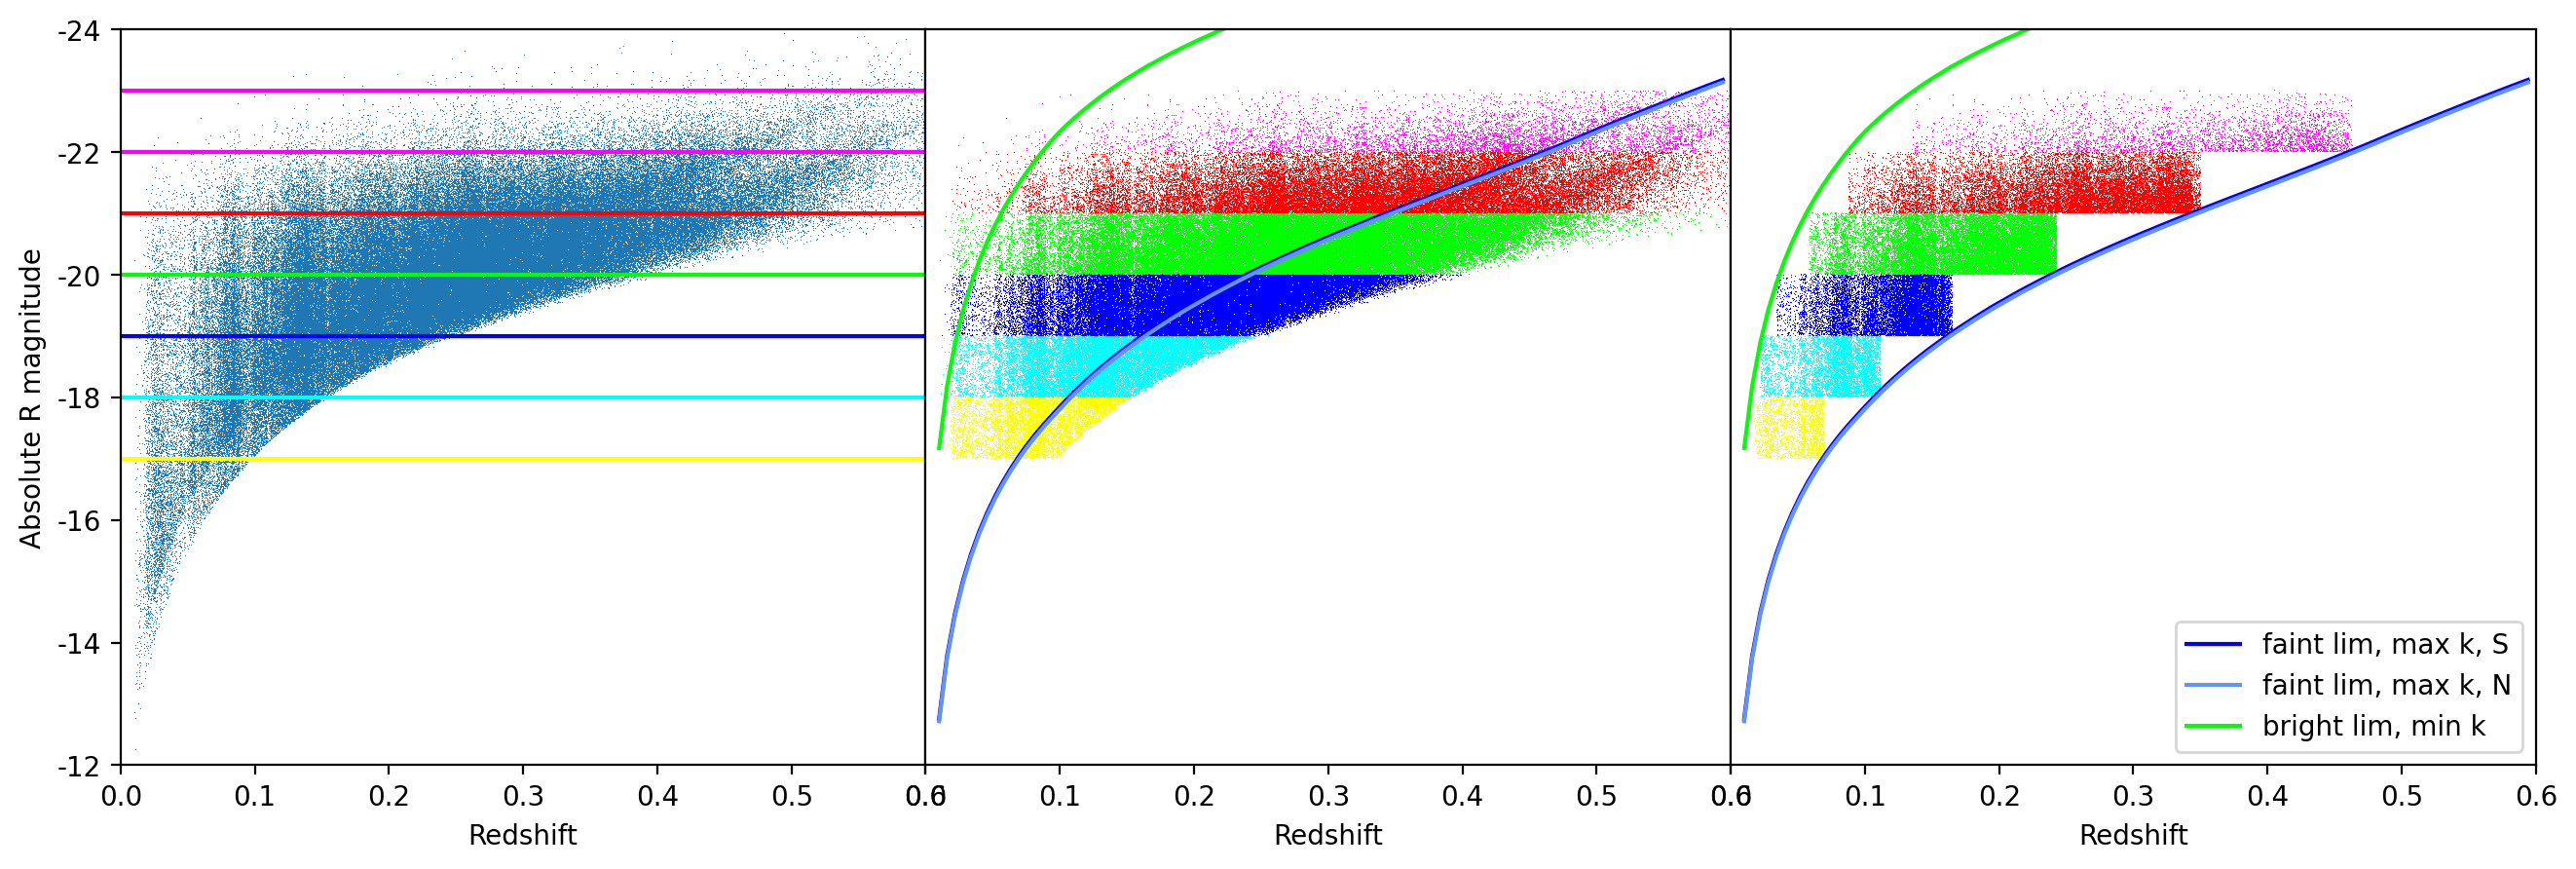

In [31]:
plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot(131)
ax1.plot(data['Z'], -data['ABSMAG_R'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax2 = plt.subplot(132)
ax2.plot(data['Z'][absmag_lim(-17,-18, data)], -data['ABSMAG_R'][absmag_lim(-17,-18, data)], lw=0, marker=',', color='yellow')
ax2.plot(data['Z'][absmag_lim(-18,-19, data)], -data['ABSMAG_R'][absmag_lim(-18,-19, data)], lw=0, marker=',', color='cyan')
ax2.plot(data['Z'][absmag_lim(-19,-20, data)], -data['ABSMAG_R'][absmag_lim(-19,-20, data)], lw=0, marker=',', color='blue')
ax2.plot(data['Z'][absmag_lim(-20,-21, data)], -data['ABSMAG_R'][absmag_lim(-20,-21, data)], lw=0, marker=',', color='lime')
ax2.plot(data['Z'][absmag_lim(-21,-22, data)], -data['ABSMAG_R'][absmag_lim(-21,-22, data)], lw=0, marker=',', color='red')
ax2.plot(data['Z'][absmag_lim(-22,-23, data)], -data['ABSMAG_R'][absmag_lim(-22,-23, data)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range, -M_range, color='tab:blue', lw=1)
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')

ax3 = plt.subplot(133)
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17,-18, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17,-18, data))], lw=0, marker=',', color='yellow')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18,-19, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18,-19, data))], lw=0, marker=',', color='cyan')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19,-20, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19,-20, data))], lw=0, marker=',', color='blue')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20,-21, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20,-21, data))], lw=0, marker=',', color='lime')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21,-22, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21,-22, data))], lw=0, marker=',', color='red')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22,-23, data))], -data['ABSMAG_R'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22,-23, data))], lw=0, marker=',', color='magenta')
#ax3.plot(zmax_range, -M_range, color='tab:blue', lw=1)
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.legend()

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8-9/sv3_mag_v_redshift.png')


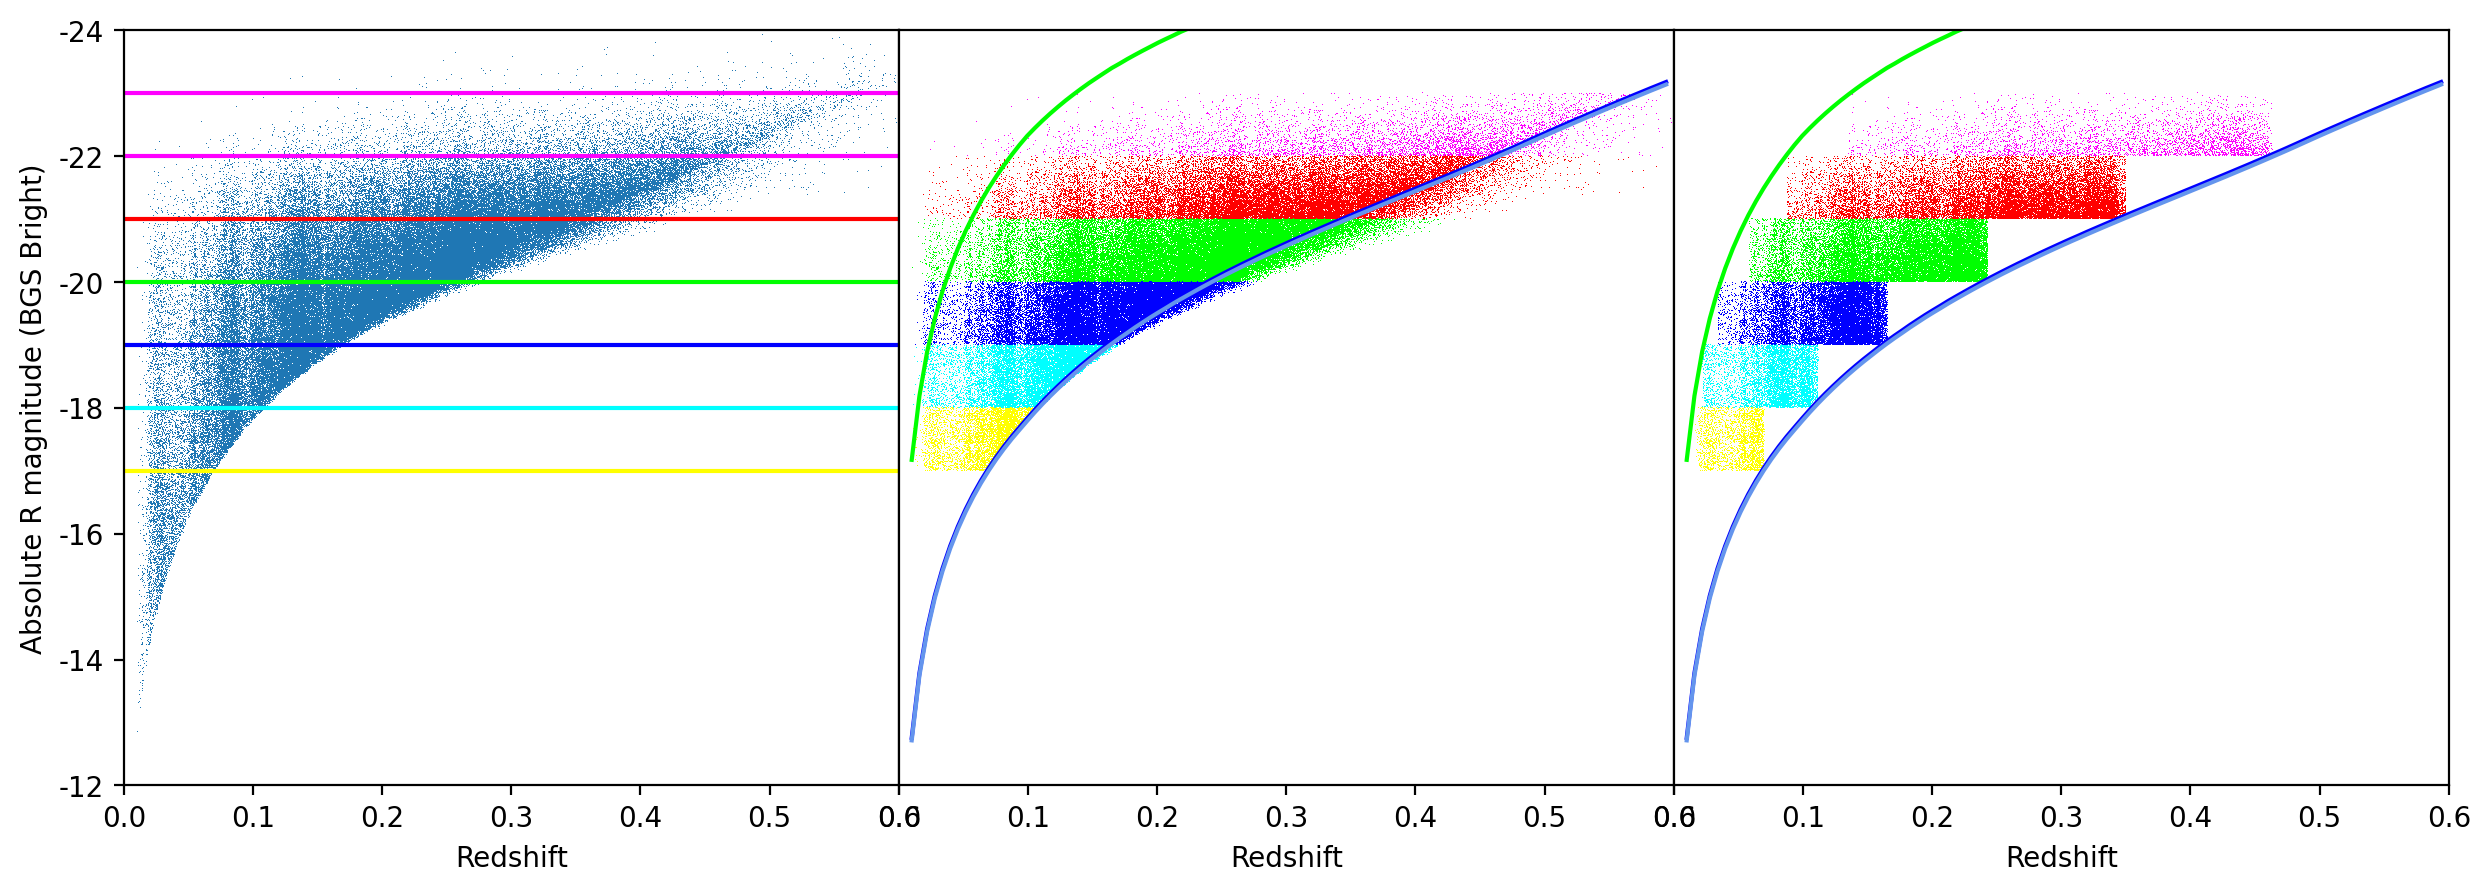

In [51]:
plt.figure(figsize=(15,5), dpi=200)
ax1 = plt.subplot(131)
#ax1.plot(zmax_range, -M_range, color='tab:blue', lw=1)
ax1.plot(data_bright['Z'], -data_bright['ABSMAG_R'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')

plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude (BGS Bright)')

ax2 = plt.subplot(132)
ax2.plot(data_bright['Z'][absmag_lim(-17,-18, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-17,-18, data_bright)], lw=0, marker=',', color='yellow')
ax2.plot(data_bright['Z'][absmag_lim(-18,-19, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-18,-19, data_bright)], lw=0, marker=',', color='cyan')
ax2.plot(data_bright['Z'][absmag_lim(-19,-20, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-19,-20, data_bright)], lw=0, marker=',', color='blue')
ax2.plot(data_bright['Z'][absmag_lim(-20,-21, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-20,-21, data_bright)], lw=0, marker=',', color='lime')
ax2.plot(data_bright['Z'][absmag_lim(-21,-22, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-21,-22, data_bright)], lw=0, marker=',', color='red')
ax2.plot(data_bright['Z'][absmag_lim(-22,-23, data_bright)], -data_bright['ABSMAG_R'][absmag_lim(-22,-23, data_bright)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range_bright, -M_range, color='tab:blue', lw=1)
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')


ax3 = plt.subplot(133)
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-17,-18, data_bright), redshift_lim_from_k(-17,-18, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-17,-18, data_bright), redshift_lim_from_k(-17,-18, data_bright))], lw=0, marker=',', color='yellow')
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-18,-19, data_bright), redshift_lim_from_k(-18,-19, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-18,-19, data_bright), redshift_lim_from_k(-18,-19, data_bright))], lw=0, marker=',', color='cyan')
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-19,-20, data_bright), redshift_lim_from_k(-19,-20, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-19,-20, data_bright), redshift_lim_from_k(-19,-20, data_bright))], lw=0, marker=',', color='blue')
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-20,-21, data_bright), redshift_lim_from_k(-20,-21, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-20,-21, data_bright), redshift_lim_from_k(-20,-21, data_bright))], lw=0, marker=',', color='lime')
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-21,-22, data_bright), redshift_lim_from_k(-21,-22, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-21,-22, data_bright), redshift_lim_from_k(-21,-22, data_bright))], lw=0, marker=',', color='red')
ax3.plot(data_bright['Z'][np.intersect1d(absmag_lim(-22,-23, data_bright), redshift_lim_from_k(-22,-23, data_bright))], -data_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-22,-23, data_bright), redshift_lim_from_k(-22,-23, data_bright))], lw=0, marker=',', color='magenta')
#ax3.plot(zmax_range_bright, -M_range, color='tab:blue', lw=1)
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8-9/sv3_mag_v_redshift_bright.png')


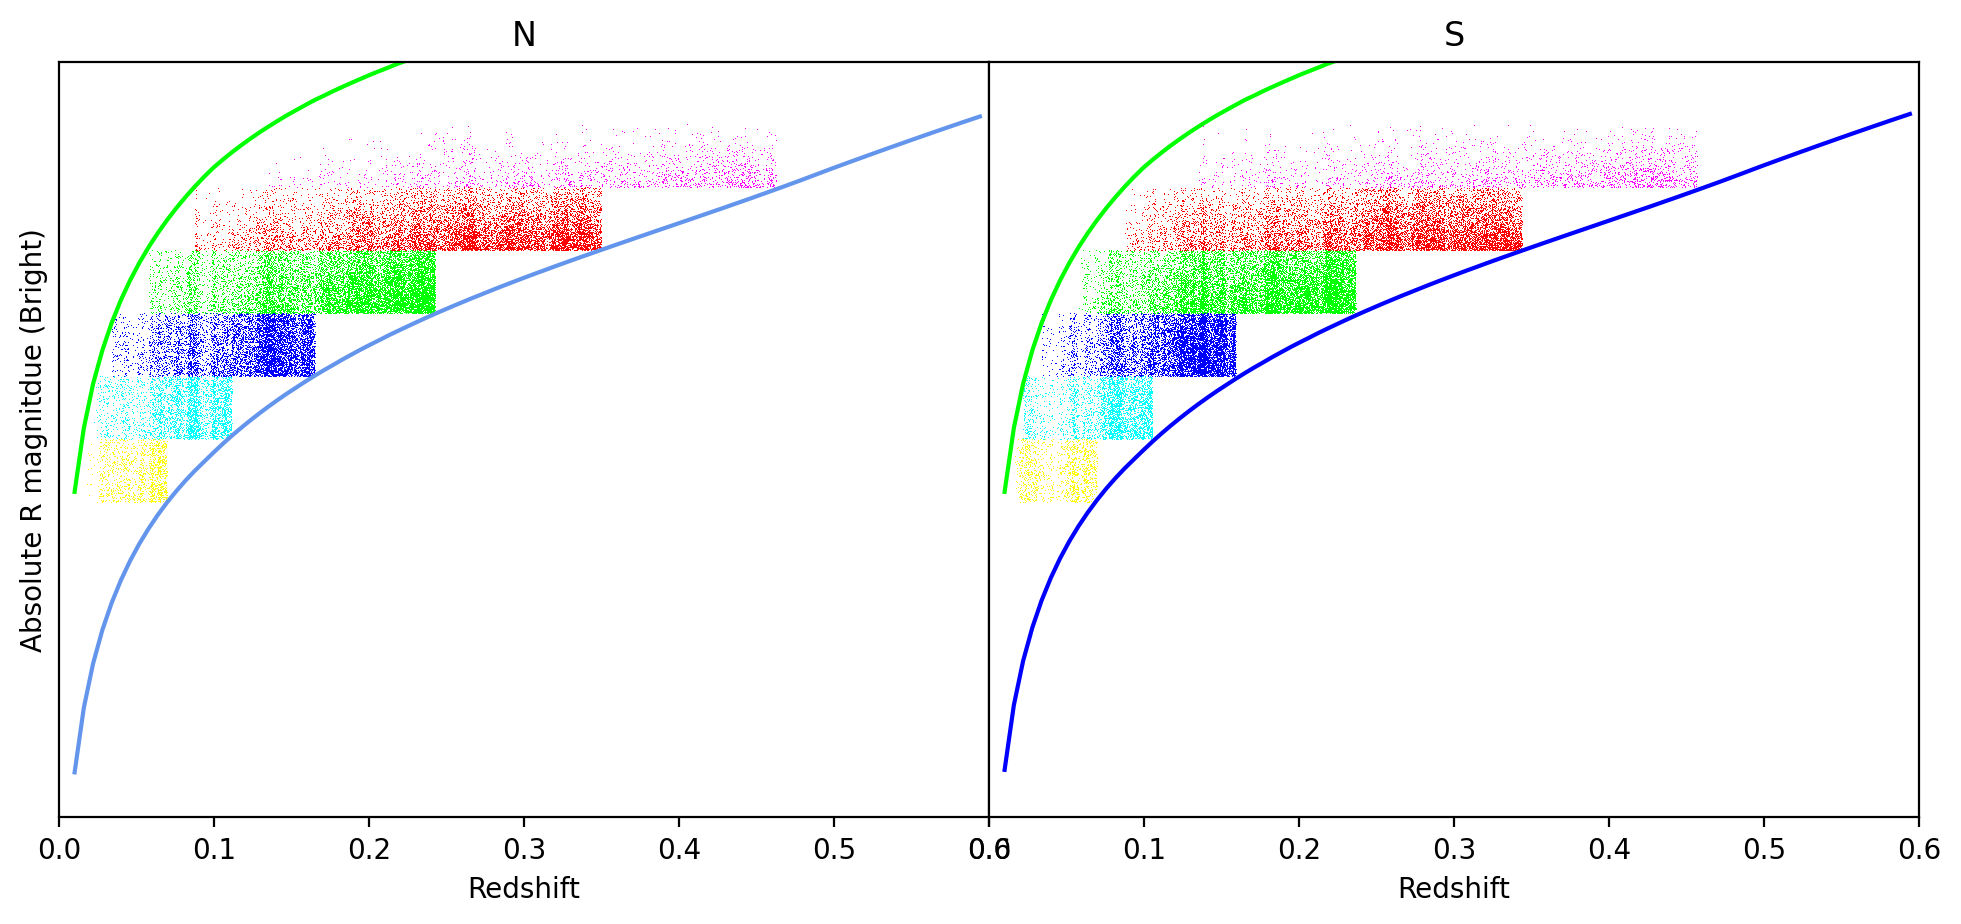

In [56]:
plt.figure(figsize=(12,5), dpi=200)

ax2 = plt.subplot(121)
plt.title('N')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-17,-18, N_bright), redshift_lim_from_k(-17,-18, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-17,-18, N_bright), redshift_lim_from_k(-17,-18, N_bright))], lw=0, marker=',', color='yellow')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-18,-19, N_bright), redshift_lim_from_k(-18,-19, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-18,-19, N_bright), redshift_lim_from_k(-18,-19, N_bright))], lw=0, marker=',', color='aqua')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-19,-20, N_bright), redshift_lim_from_k(-19,-20, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-19,-20, N_bright), redshift_lim_from_k(-19,-20, N_bright))], lw=0, marker=',', color='blue')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-20,-21, N_bright), redshift_lim_from_k(-20,-21, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-20,-21, N_bright), redshift_lim_from_k(-20,-21, N_bright))], lw=0, marker=',', color='lime')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-21,-22, N_bright), redshift_lim_from_k(-21,-22, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-21,-22, N_bright), redshift_lim_from_k(-21,-22, N_bright))], lw=0, marker=',', color='red')
ax2.plot(N_bright['Z'][np.intersect1d(absmag_lim(-22,-23, N_bright), redshift_lim_from_k(-22,-23, N_bright))], -N_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-22,-23, N_bright), redshift_lim_from_k(-22,-23, N_bright))], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range_bright, -M_range, color='tab:blue', lw=1)
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitdue (Bright)')

ax3 = plt.subplot(122)
plt.title('S')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-17,-18, S_bright), redshift_lim_from_k(-17,-18, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-17,-18, S_bright), redshift_lim_from_k(-17,-18, S_bright))], lw=0, marker=',', color='yellow')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-18,-19, S_bright), redshift_lim_from_k(-18,-19, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-18,-19, S_bright), redshift_lim_from_k(-18,-19, S_bright))], lw=0, marker=',', color='aqua')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-19,-20, S_bright), redshift_lim_from_k(-19,-20, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-19,-20, S_bright), redshift_lim_from_k(-19,-20, S_bright))], lw=0, marker=',', color='blue')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-20,-21, S_bright), redshift_lim_from_k(-20,-21, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-20,-21, S_bright), redshift_lim_from_k(-20,-21, S_bright))], lw=0, marker=',', color='lime')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-21,-22, S_bright), redshift_lim_from_k(-21,-22, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-21,-22, S_bright), redshift_lim_from_k(-21,-22, S_bright))], lw=0, marker=',', color='red')
ax3.plot(S_bright['Z'][np.intersect1d(absmag_lim(-22,-23, S_bright), redshift_lim_from_k(-22,-23, S_bright))], -S_bright['ABSMAG_R'][np.intersect1d(absmag_lim(-22,-23, S_bright), redshift_lim_from_k(-22,-23, S_bright))], lw=0, marker=',', color='magenta')
#ax3.plot(zmax_range_bright, -M_range, color='tab:blue', lw=1)S_bright
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8-9/sv3_mag_v_redshift_bright_NS.png')


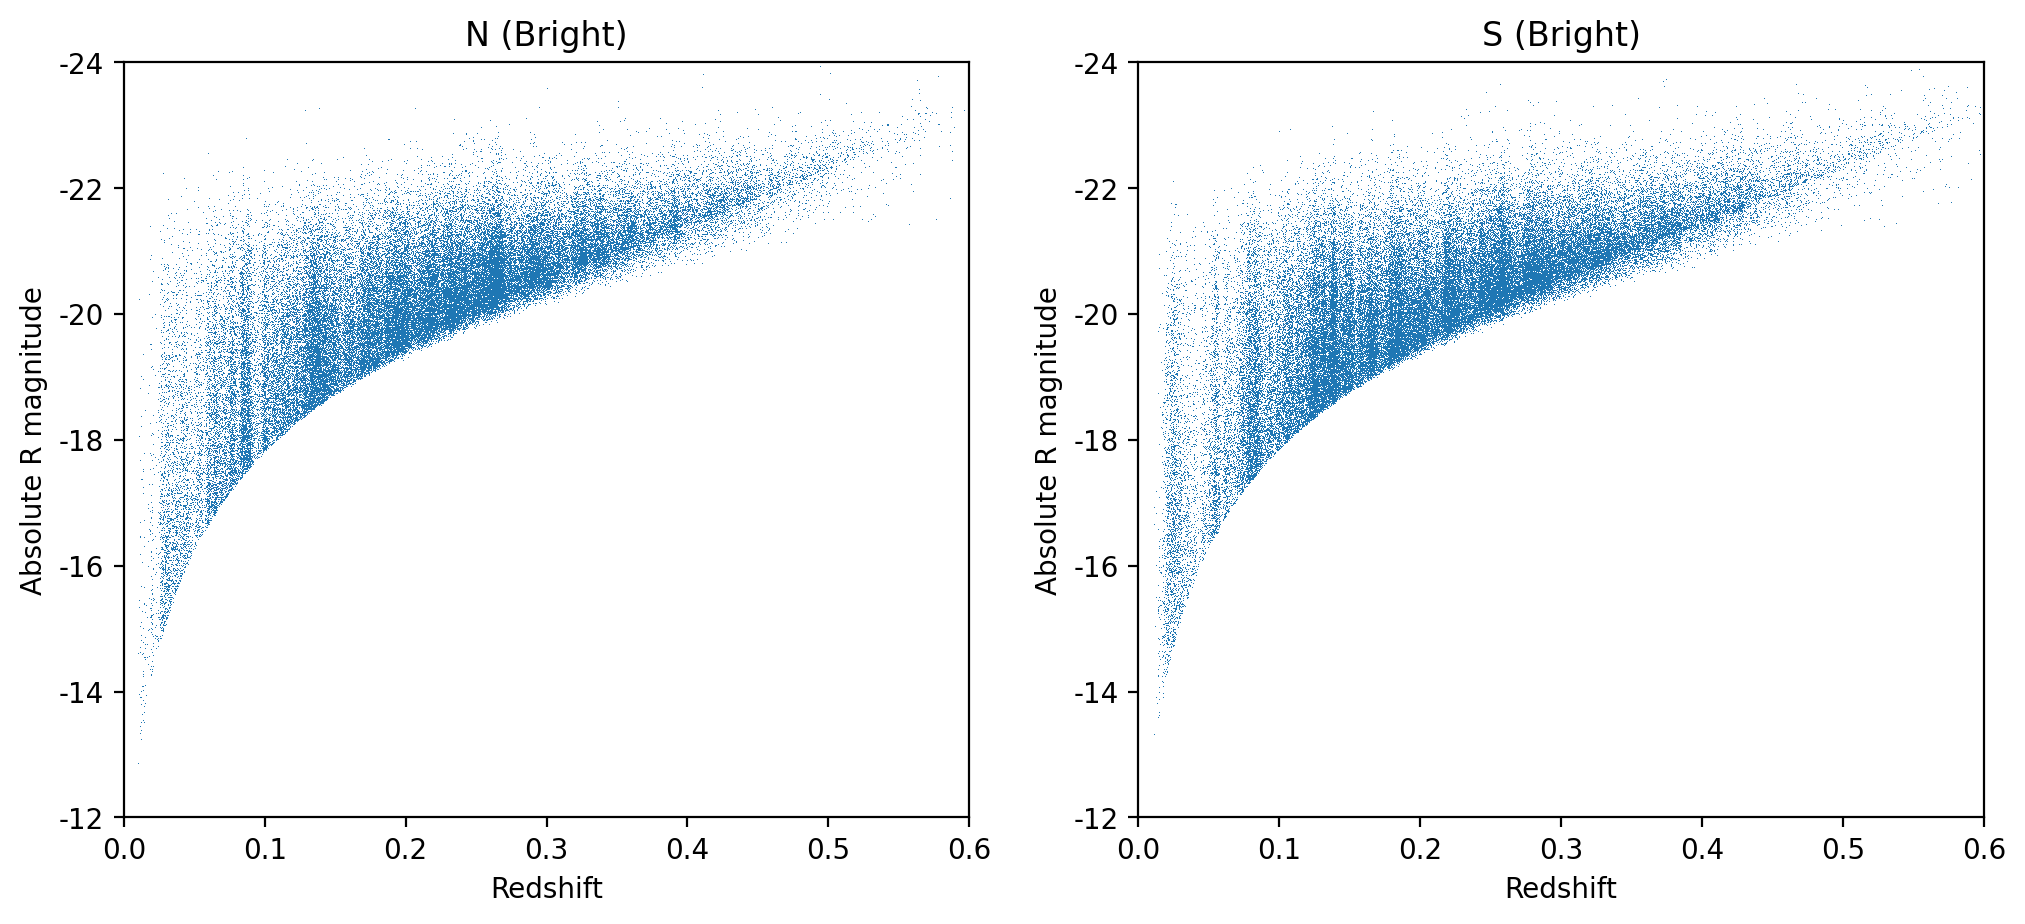

In [40]:
plt.figure(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(N_bright['Z'], -N_bright['ABSMAG_R'], lw=0, marker=',')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')
plt.title('N (Bright)')

ax2 = plt.subplot(122)
ax2.plot(S_bright['Z'], -S_bright['ABSMAG_R'], lw=0, marker=',')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')
plt.title('S (Bright)')
plt.savefig('../figures/week8/sv3_mag_v_redshift_NS_BRIGHT.png')

In [41]:
dd

NameError: name 'dd' is not defined

In [ ]:
plt.figure(figsize=(16,10),dpi=150)
ax1 = plt.subplot(231)
ax1.plot(data['Z'], data['WEIGHT'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,70)

ax4 = plt.subplot(234)
ax4.plot(data['Z'], data['WEIGHT'], lw=0, marker=',')
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,5)

ax2 = plt.subplot(232)
ax2.plot(data['Z'], data['WEIGHT_ZFAIL'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Zfail Weight')
plt.ylim(0.995,1.029)

ax3 = plt.subplot(233)
ax3.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
ax3.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('FKP Weight')
plt.ylim(0,1)

plt.savefig('../figures/week8/sv3_weights.png')

#https://desi.lbl.gov/trac/wiki/ClusteringWG/LSScat/SV3/current_version
#WEIGHT = 129/(128*PROB_OBS + 1)
#There is one object which has zero probobs

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.hist(data['WEIGHT'], np.arange(0,70,0.5))
ax.set_yscale('log')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.text(20,1000,'WEIGHT = 129/(128*PROB_OBS + 1)', size=8)
plt.savefig('../figures/week8/sv3_weight_hist.png')

In [ ]:
np.where(data['WEIGHT'] == np.max(data['WEIGHT']))

In [ ]:
data[189729]